# Spanish, Spacy, Gensim and Aphorisms

In [5]:
# !python -m spacy download es_core_news_sm

# import modules & set up logging
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
import spacy
from spacy.lang.es.examples import sentences 

In [7]:
nlp = spacy.load('es_core_news_sm')
doc = nlp(sentences[0])

In [8]:
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.lemma_)

Apple está buscando comprar una startup del Reino Unido por mil millones de dólares
Apple PROPN nsubj Apple
está AUX aux estar
buscando VERB ROOT buscar
comprar VERB xcomp comprar
una DET det uno
startup NOUN obj startup
del ADP case del
Reino PROPN nmod Reino
Unido PROPN flat Unido
por ADP case por
mil NUM nummod mil
millones NOUN obl millón
de ADP case de
dólares NOUN nmod dólar


In [9]:
doc3s = nlp(u"Esta es una      frase.          Y esta es otra frase.  [[Pero, est es la ultima frase]].")
for sent in doc3s.sents:
    print(sent.text)

Esta es una      frase.          
Y esta es otra frase.  
[[Pero, est es la ultima frase]].


In [13]:
!pwd

/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga


In [17]:
file_aphor_labels = '/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms-label.txt'

file_aphor_nolabels = '/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms-nolabel.txt'

fh = open(file_aphor_labels, encoding='utf-8')
aphor_label_raw = fh.read()
fh.close
type(aphor_label_raw)
len(aphor_label_raw)
print(aphor_label_raw[1:500])

print("===================")

fh = open(file_aphor_nolabels, encoding='utf-8')
aphor_nolabel_raw = fh.read()
fh.close
type(aphor_nolabel_raw)
len(aphor_nolabel_raw)
print(aphor_nolabel_raw[1:500])



El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello. [[personalidades, molestia, corpóreo, cabeza, humano, cine]]





El hipopótamo parece un buzón de alcance en espera de cartas. ¿Cartas para el África? ¿Carta
as cintas de las gorras de los marinos van diciendo adiós a


todos los mares.








Cuando la mujer se pone una media en la mano para ver si


tiene un punto saltado, su brazo toma perversión de pierna.








La gota de lacre que cae fuera de sitio es una verruga de la


carta.








Las plumas estilográficas son desobedientes como niños que


no saben o no quieren escribir.








El rayo es una especie de sacacorchos encolerizado.








Lo más maravilloso de la prestidigitación case


In [18]:
import pandas as pd
import re
import string

# Integer weights given to tags words (0 = remove)
TAG_WT = 0
# If missing tags completely, this hold the sequential number of aphorism as linearly processed (neg = no missing tags)
tag_miss = -1

exclude_punct = set(string.punctuation)

In [19]:
aphor_wtags = [] # List of all tags associated with current aphorism
aphor_no = 0 # Current number of aphorism being processed

# FUTURE: to store in pandas df for greater functionality (e.g. graphing/EDA)
data = pd.DataFrame(columns = ['aphor', 'tags'])

def remove_dup_spaces(l):
  words = [w for w in l.split('\n') if w != '']
  return ' '.join(words)

def striplist(l):
    return([x.strip() for x in l])

# aphor_nolable_raw

# Process labelled aphorisms

aphor_tags_str = aphor_label_raw.split("]]") # Split each line into 'aphorism' and 'tags'

aphor_both = []
line_no = 0

for line in aphor_tags_str:
    line_no += 1
    line_both = line.split("[[")
    aphor = line_both[0].strip()
    try:
        line_both[1]
        tags = line_both[1].strip()
    except IndexError:
        tags = ''
        
    aphor = remove_dup_spaces(aphor)
    
    # Process Aphorism string
    line_sp = "".join([re.sub(" +"," ",x) for x in line]) # Collapse spaces
    line_nl = "".join([re.sub("\n+","\n",x) for x in line_sp]) # Collapse new lines
    print("LINE {}: ---{}---".format(line_no, aphor))
    print("LINE {}: ---{}---".format(line_no, tags))
    
    # Old
    # aphor0 = remove_dup_spaces(new[0])
    # aphor1 = [''.join(ch for ch in w if ch not in exclude_punct) for w in aphor0.split(' ') if len(w) > 0]
  
    # Process tag string
    if len(tags) < 2:
        print("ERROR: no tags for aphorism #{}: text: {}".format(line_no, tags))
        # tags = []
        aphor_both = aphor
    else:
        tags_ws = tags.split(",")
        # print(type(tags))
        tags = [tag_word.strip() for tag_word in tags_ws]
        # striplist(tags)
        
    aphor_both = aphor + (TAG_WT * str(tags))
    
    # Add each processed line to the cumulative list of aphorisms with tags
    if (len(aphor) > 1):
        aphor_wtags.append(aphor_both)

print(len(aphor_wtags))

LINE 1: ---El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.---
LINE 1: ---personalidades, molestia, corpóreo, cabeza, humano, cine---
LINE 2: ---El hipopótamo parece un buzón de alcance en espera de cartas. ¿Cartas para el África? ¿Cartas para la región de los Lagos Centrales? Arca postal para en medio de los desiertos caliginosos hubiéramos arrojado en su boquete una misiva cualquiera si tuviésemos amigos en aquéllas regiones inhóspitas. ¡Con qué hambre de cartas nos abre su boca en los parques zoológicos!---
LINE 2: ---naturaleza, animales, comparaciones, objetos, buzón, epístola, geografía---
LINE 3: ---Abunda ahora mucho ese tipo avaro de filos, que afila dos cuchillos, uno contra otro, como si 

LINE 354: ---En suma lo que vale es el soma.---
LINE 354: ---comida---
LINE 355: ---La Esfinge es sordomuda y ciega.---
LINE 355: ---esculptura---
LINE 356: ---Juraba amor eterno poniendo la mano sobre uno de esos libros simulados que tienen bombones dentro.---
LINE 356: ---sentimientos, personalidad, comida, chocolate---
LINE 357: ---El jardín esconde en su pecho las violetas.---
LINE 357: ---lugares, flores, corpóreo---
LINE 358: ---Las primeras canas son los hilvanes de la vejez.---
LINE 358: ---corpóreo, edad---
LINE 359: ---El jabón muere en tarjeta de despedida.---
LINE 359: ---objetos, muerte---
LINE 360: ---Cuando trinchamos la morcilla sorprendemos que había comido piñones.---
LINE 360: ---comida---
LINE 361: ---Tablero de ajedrez: Alfonso el Sabio jugando con el Condestable.---
LINE 361: ---objetos, humano---
LINE 362: ---El sapo está hecho de verrugas de barro.---
LINE 362: ---anfibios, animales, corpóreo---
LINE 363: ---Al gusano de seda le perdió tener cuna de oro.---
LINE

LINE 706: ---Hay mujeres que arreglan de tal modo sus pestañas, que sus ojos son como temibles estrellas negras.---
LINE 706: ---mujer, estético, maquillaje, corpóreo---
LINE 707: ---Se asustan tanto los diabéticos que creen que un terrón es una lápida.---
LINE 707: ---enfermedades, personalidades, asustadizo---
LINE 708: ---Parece que ese enfermero que es el peluquero nos va a decir abusando del sopor perezoso del cliente en el sillón: «¿Aprovechamos para operar la apendicitis?».---
LINE 708: ---oficios, comparaciones, salud---
LINE 709: ---Ese que toma el tintero por cenicero es el terror de las casas.---
LINE 709: ---personalidades---
LINE 710: ---La Y griega mayúscula es la copa de champaña del alfabeto.---
LINE 710: ---escritura, comparaciones, letras, objetos, copas---
LINE 711: ---Es feo sentarse en esas mesas en las que aún queda la colilla de la propina que no ha recogido el camarero.---
LINE 711: ---negocios, restaurantes, dinero, propina, oficios, camarero---
LINE 712: ---Ci

LINE 1047: ---Hay un gesto que no acaba de ser elegante, por más que presuma de elegancia, y es el de llevar la cayada del bastón enganchada al hombro. El aire es de soltura distinguida; pero, en realidad, además de ser anticuado, parece que se rasca la espalda el que lo hace.---
LINE 1047: ---objetos, bastón, elegancia, gestos, anticuado---
LINE 1048: ---Las gallinas del porvenir serán tan educadas que pondrán sus huevos en hueveras.---
LINE 1048: ---educación, futuro, animales---
LINE 1049: ---El monóculo es el llavero de las miradas.---
LINE 1049: ---comparaciones, objetos, llavero, monóculo---
LINE 1050: ---Los canguros son los bolsistas del Zoo, porque son los únicos animales que tienen bolsillo.---
LINE 1050: ---animales, comparaciones, oficios, bolsista, finanzas, economía---
LINE 1051: ---El camello está siempre apolillado.---
LINE 1051: ---animales, apariencia---
LINE 1052: ---El que come espárragos con mayonesa parece chuparse los dedos de los guantes amarillos.---
LINE 1052:

LINE 1321: ---Hay perros de caza que se pasan la vida mirando a sus dueños para ver si al fin se deciden a ser cazadores.---
LINE 1321: ---animales, perro, instinto---
LINE 1322: ---Las «manos» ancianas que tienen los loros les dan un aire brujesco.---
LINE 1322: ---aves, corpóreo, comparaciones, leyendas, brujas---
LINE 1323: ---Entornaba los ojos como atesorando el mundo. Lo absorbía en cada uno de sus guiños de corta de vista.---
LINE 1323: ---gestos, apreciación---
LINE 1324: ---¿Por qué han quedado en la vida esos viejos? Se ve que son los que no debían haber quedado de ninguna manera. Es una de las injusticias mayores de la suerte equivocar los viejos que debían quedar.---
LINE 1324: ---vejez, muerte, justicia---
LINE 1325: ---Torpedo: tiburón de dinamita.---
LINE 1325: ---armas, comparaciones, peces---
LINE 1326: ---Hay unas piernas en la procesión pernil que están abundando más de lo debido y que podríamos titular «piernas de liebre desollada».---
LINE 1326: ---corpóreo, animal

LINE 1616: ---Basta decir «cornamusa» para que suene la cornamusa con ese son prolongado y elegiaco que llena los valles y los bosques...---
LINE 1616: ---instrumentos-musicales, cornamusa, música---
LINE 1617: ---Los galgos son la llanura que se alarga y corre, como si se hubiese levantado el lomo de tierra que queda entre los surcos que hace el arado.---
LINE 1617: ---comparaciones, animales, perros, tierra---
LINE 1618: ---¿Se puede consentir eso de «calzarse un guante»? Ésa es una barbaridad incorrecta y disonante, que sólo se les ocurre a los hablistas.---
LINE 1618: ---accesorios, guantes, oficios, hablistas---
LINE 1619: ---El gabán debe ser del color de la lluvia o del color del tiempo. Sólo algunos miserables tienen de esos supremos y perfectos gabanes.---
LINE 1619: ---ropa, color, comparaciones, naturaleza---
LINE 1620: ---La fraternidad de tres pares de calcetines es conmovedora y tiene rebaja.---
LINE 1620: ---accesorios, medias, dispares---
LINE 1621: ---Los sillones de m

LINE 1720: ---Las cintas de las gorras de los marinos van diciendo adiós a todos los mares. Cuando la mujer se pone una media en la mano para ver si tiene un punto saltado, su brazo toma perversión de pierna. La gota de lacre que cae fuera de sitio es una verruga de la carta. Las plumas estilográficas son desobedientes como niños que no saben o no quieren escribir. El rayo es una especie de sacacorchos encolerizado. Lo más maravilloso de la prestidigitación casera es el sacar una llave de un llavero. -¿Oyes ese olor? -dijo ella en el jardín. El que toma el refresco con dos pajas parece que toca la do- ble flauta de Pan. Al desaguar el baño produce el agua un suave murmullo en- tre letanía y responso. Botella: sarcófago del vino. AI pasar un barco entre dos casas, parece un barco de teatro entre bastidor y bastidor. Los corsés musicales de la pianola. Toldo tiene en la T la cobijadora sombrilla que cubre el resto de las letras de su palabra. La flor del cardo nació para brocha de afeita

In [20]:
print(aphor_wtags[0])
print("==========")
print(aphor_wtags[1718])

El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.
La casa de té está llena de los yes que estornudan los ingleses.


In [21]:
# Create Aphorism (+ Multiple*Tag Words) Vectors

doc = nlp(aphor_wtags[0])
for sent in doc.sents:
    print("SENT: " + sent.text)
    
for token in doc:
    print("TOKEN: " + token.text)

SENT: El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza.
SENT: Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.
TOKEN: El
TOKEN: que
TOKEN: asiste
TOKEN: al
TOKEN: cinematógrafo
TOKEN: quisiera
TOKEN: que
TOKEN: todo
TOKEN: el
TOKEN: público
TOKEN: que
TOKEN: llena
TOKEN: la
TOKEN: sala
TOKEN: ,
TOKEN: desde
TOKEN: su
TOKEN: fila
TOKEN: a
TOKEN: la
TOKEN: pantalla
TOKEN: ,
TOKEN: careciese
TOKEN: de
TOKEN: cabeza
TOKEN: .
TOKEN: Necesita
TOKEN: el
TOKEN: calor
TOKEN: humano
TOKEN: de
TOKEN: los
TOKEN: demás
TOKEN: para
TOKEN: completar
TOKEN: el
TOKEN: espectáculo
TOKEN: ,
TOKEN: porque
TOKEN: no
TOKEN: le
TOKEN: resultaría
TOKEN: una
TOKEN: sala
TOKEN: vacía
TOKEN: ,
TOKEN: pero
TOKEN: no
TOKEN: le
TOKEN: desagradaría
TOKEN: el
TOKEN: panorama
TOKE

In [23]:
sp_stop_set = spacy.lang.es.stop_words.STOP_WORDS
sp_stop_set.add('a')
# print("TYPE: " + str(type(sp_stop_str)))
# sp_stop_ls = list(set(sp_stop_str))
sp_stop_ls = list(sp_stop_set)


excl_punct_str = string.punctuation + '¿' + '¡'
excl_punct = list(set(excl_punct_str))

print(excl_punct)

["'", '+', '_', '%', ',', '[', '<', '(', '/', ')', '"', '¡', '>', '@', '|', '^', ':', '.', '~', '\\', '`', ';', '!', '$', '{', '#', '*', '&', '¿', ']', '=', '?', '-', '}']


In [24]:
print('Number of stop words: %d' % len(sp_stop_ls))
print('First 10 stop words: %s' % list(sp_stop_ls)[:10])
print('Excluded punctuation: %s' % excl_punct)

Number of stop words: 552
First 10 stop words: ['mismo', 'despacio', 'modo', 'usamos', 'estuvo', 'algún', 'durante', 'hemos', 'eres', 'esas']
Excluded punctuation: ["'", '+', '_', '%', ',', '[', '<', '(', '/', ')', '"', '¡', '>', '@', '|', '^', ':', '.', '~', '\\', '`', ';', '!', '$', '{', '#', '*', '&', '¿', ']', '=', '?', '-', '}']


In [25]:
# Remove common stopwords and tokenize and lemmatize
import string

aphor_clean = []
tr = str.maketrans("", "", excl_punct_str)

# aphor_clean = [[word for word in document.translate(tr).lower().split() if word not in sp_stop_ls]
#                  for document in aphor_wtags]

aphor_clean = []
for document in aphor_wtags:
    print()
    doc_clean = " ".join(document.translate(tr).lower().split()) # remove punct, lowercase
    doc_pos = nlp(doc_clean)
    aphor_line = []
    for token in doc_pos: # lemmatize
        token_text = token.text
        if token_text not in sp_stop_ls: # remove stopwords
            aphor_line.append(token_text)
            print("NOT STOPWORD: " + token_text)
        else:
            print("STOPWORD: " + token_text)
    aphor_clean.append(aphor_line)
        


STOPWORD: el
STOPWORD: que
NOT STOPWORD: asiste
STOPWORD: al
NOT STOPWORD: cinematógrafo
NOT STOPWORD: quisiera
STOPWORD: que
STOPWORD: todo
STOPWORD: el
NOT STOPWORD: público
STOPWORD: que
NOT STOPWORD: llena
STOPWORD: la
NOT STOPWORD: sala
STOPWORD: desde
STOPWORD: su
NOT STOPWORD: fila
STOPWORD: a
STOPWORD: la
NOT STOPWORD: pantalla
NOT STOPWORD: careciese
STOPWORD: de
NOT STOPWORD: cabeza
NOT STOPWORD: necesita
STOPWORD: el
NOT STOPWORD: calor
NOT STOPWORD: humano
STOPWORD: de
STOPWORD: los
STOPWORD: demás
STOPWORD: para
NOT STOPWORD: completar
STOPWORD: el
NOT STOPWORD: espectáculo
STOPWORD: porque
STOPWORD: no
STOPWORD: le
NOT STOPWORD: resultaría
STOPWORD: una
NOT STOPWORD: sala
NOT STOPWORD: vacía
STOPWORD: pero
STOPWORD: no
STOPWORD: le
NOT STOPWORD: desagradaría
STOPWORD: el
NOT STOPWORD: panorama
NOT STOPWORD: desolador
STOPWORD: de
STOPWORD: la
NOT STOPWORD: sala
NOT STOPWORD: poblada
STOPWORD: de
NOT STOPWORD: gentes
STOPWORD: sólo
NOT STOPWORD: vivas
STOPWORD: hasta
STOP

STOPWORD: el
NOT STOPWORD: marinero
STOPWORD: a
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: del
NOT STOPWORD: puerto
STOPWORD: quién
STOPWORD: eres
STOPWORD: que
STOPWORD: te
NOT STOPWORD: has
NOT STOPWORD: prendido
STOPWORD: tanto
STOPWORD: de
STOPWORD: mí
STOPWORD: yo
STOPWORD: soy
STOPWORD: el
NOT STOPWORD: ancla

STOPWORD: cuando
STOPWORD: en
STOPWORD: la
NOT STOPWORD: música
NOT STOPWORD: entran
NOT STOPWORD: campanas
STOPWORD: de
NOT STOPWORD: cristal
NOT STOPWORD: comienza
STOPWORD: la
NOT STOPWORD: licorería
STOPWORD: de
STOPWORD: la
NOT STOPWORD: música

NOT STOPWORD: velas
STOPWORD: de
STOPWORD: los
NOT STOPWORD: balandros
STOPWORD: como
NOT STOPWORD: servilletas
STOPWORD: en
STOPWORD: las
NOT STOPWORD: copas
STOPWORD: del
NOT STOPWORD: banquete
STOPWORD: del
NOT STOPWORD: mar

STOPWORD: el
STOPWORD: día
STOPWORD: que
STOPWORD: se
NOT STOPWORD: case
STOPWORD: un
NOT STOPWORD: pensamiento
STOPWORD: con
STOPWORD: una
NOT STOPWORD: violeta
STOPWORD: estará
NOT STOPWORD: consumada

STOPWORD: no
STOPWORD: hay
STOPWORD: que
NOT STOPWORD: tirarse
STOPWORD: desde
STOPWORD: demasiado
NOT STOPWORD: alto
STOPWORD: para
STOPWORD: no
NOT STOPWORD: arrepentirse
STOPWORD: en
STOPWORD: el
NOT STOPWORD: camino

STOPWORD: un
NOT STOPWORD: grito
STOPWORD: en
STOPWORD: el
NOT STOPWORD: campo
STOPWORD: es
STOPWORD: un
NOT STOPWORD: tiro
STOPWORD: a
STOPWORD: los
NOT STOPWORD: pájaros

STOPWORD: tenía
STOPWORD: una
NOT STOPWORD: boca
STOPWORD: tan
NOT STOPWORD: perfecta
STOPWORD: que
STOPWORD: se
NOT STOPWORD: dudaba
STOPWORD: si
STOPWORD: la
STOPWORD: podría
NOT STOPWORD: abrir

NOT STOPWORD: atacaba
STOPWORD: con
STOPWORD: tal
NOT STOPWORD: furia
STOPWORD: las
NOT STOPWORD: notas
STOPWORD: que
NOT STOPWORD: parecía
NOT STOPWORD: tocar
STOPWORD: a
STOPWORD: cuatro
NOT STOPWORD: manos

STOPWORD: todos
NOT STOPWORD: notaron
STOPWORD: que
NOT STOPWORD: repercutía
NOT STOPWORD: repetida
STOPWORD: la
NOT STOPWORD: oración
NOT STOPWORD: fúnebre
NOT STOPWORD: y
STOPWORD: sólo
STOPWORD: 

STOPWORD: la
NOT STOPWORD: pesadilla
STOPWORD: es
STOPWORD: un
NOT STOPWORD: sueño
NOT STOPWORD: equivocado
STOPWORD: que
STOPWORD: en
STOPWORD: vez
STOPWORD: de
NOT STOPWORD: soñarlo
STOPWORD: con
STOPWORD: las
NOT STOPWORD: circunvoluciones
STOPWORD: del
NOT STOPWORD: cerebro
STOPWORD: se
NOT STOPWORD: sueña
STOPWORD: con
STOPWORD: las
STOPWORD: de
STOPWORD: las
NOT STOPWORD: tripas

STOPWORD: a
STOPWORD: veces
STOPWORD: nos
NOT STOPWORD: preguntamos
STOPWORD: cómo
STOPWORD: algún
NOT STOPWORD: hombre
NOT STOPWORD: malísimo
STOPWORD: puede
NOT STOPWORD: proceder
STOPWORD: de
STOPWORD: la
NOT STOPWORD: santa
NOT STOPWORD: familia
STOPWORD: que
NOT STOPWORD: ocupó
STOPWORD: el
NOT STOPWORD: arca
STOPWORD: pero
STOPWORD: para
NOT STOPWORD: comprenderlo
NOT STOPWORD: pensamos
STOPWORD: que
NOT STOPWORD: alguien
STOPWORD: se
NOT STOPWORD: metió
STOPWORD: de
NOT STOPWORD: polizón

STOPWORD: era
STOPWORD: de
STOPWORD: esas
NOT STOPWORD: mujeres
STOPWORD: que
STOPWORD: nos
NOT STOPWORD: pasa

STOPWORD: lo
STOPWORD: peor
STOPWORD: de
STOPWORD: los
NOT STOPWORD: árboles
NOT STOPWORD: genealógicos
STOPWORD: es
STOPWORD: que
STOPWORD: de
STOPWORD: pronto
STOPWORD: se
NOT STOPWORD: fija
STOPWORD: en
STOPWORD: ellos
STOPWORD: la
NOT STOPWORD: chismosa
NOT STOPWORD: chicharra

STOPWORD: el
NOT STOPWORD: tren
STOPWORD: parece
STOPWORD: el
NOT STOPWORD: buscapiés
STOPWORD: del
NOT STOPWORD: paisaje

STOPWORD: las
NOT STOPWORD: estrellas
STOPWORD: están
STOPWORD: tan
NOT STOPWORD: deslumbradas
STOPWORD: por
STOPWORD: su
NOT STOPWORD: luz
STOPWORD: que
STOPWORD: no
STOPWORD: pueden
NOT STOPWORD: verse
STOPWORD: unas
STOPWORD: a
STOPWORD: otras

STOPWORD: hay
NOT STOPWORD: suspiros
STOPWORD: que
NOT STOPWORD: comunican
STOPWORD: la
NOT STOPWORD: vida
STOPWORD: con
STOPWORD: la
NOT STOPWORD: muerte

STOPWORD: el
NOT STOPWORD: triángulo
NOT STOPWORD: escaleno
STOPWORD: lo
NOT STOPWORD: vemos
STOPWORD: con
NOT STOPWORD: escalerilla
STOPWORD: propia
STOPWORD: para
NOT STOPWORD: subir
STOPW

STOPWORD: los
NOT STOPWORD: auriculares
STOPWORD: son
STOPWORD: las
NOT STOPWORD: gafas
NOT STOPWORD: ahumadas
STOPWORD: de
STOPWORD: los
NOT STOPWORD: oídos

STOPWORD: cuando
NOT STOPWORD: cae
STOPWORD: una
NOT STOPWORD: estrella
STOPWORD: se
STOPWORD: le
NOT STOPWORD: corre
STOPWORD: un
NOT STOPWORD: punto
STOPWORD: a
STOPWORD: la
NOT STOPWORD: media
STOPWORD: de
STOPWORD: la
NOT STOPWORD: noche

STOPWORD: la
NOT STOPWORD: pluma
STOPWORD: del
NOT STOPWORD: balandro
NOT STOPWORD: escribe
STOPWORD: el
NOT STOPWORD: soneto
STOPWORD: de
STOPWORD: la
NOT STOPWORD: regata

NOT STOPWORD: peatón
STOPWORD: es
STOPWORD: aquel
STOPWORD: que
STOPWORD: da
STOPWORD: los
STOPWORD: más
NOT STOPWORD: terribles
NOT STOPWORD: pisotones

STOPWORD: hay
STOPWORD: algo
STOPWORD: de
NOT STOPWORD: suprema
NOT STOPWORD: felicidad
STOPWORD: cuando
STOPWORD: en
STOPWORD: la
NOT STOPWORD: prolongada
NOT STOPWORD: curva
STOPWORD: del
NOT STOPWORD: viaje
NOT STOPWORD: vemos
STOPWORD: de
NOT STOPWORD: cabeza
STOPWO

NOT STOPWORD: pájaro
NOT STOPWORD: patas
STOPWORD: de
NOT STOPWORD: alambre
NOT STOPWORD: y
NOT STOPWORD: cuerpo
STOPWORD: de
NOT STOPWORD: carne

STOPWORD: el
NOT STOPWORD: reloj
NOT STOPWORD: municipal
NOT STOPWORD: marca
STOPWORD: las
STOPWORD: horas
STOPWORD: de
STOPWORD: los
NOT STOPWORD: impuestos

STOPWORD: hay
NOT STOPWORD: señoras
STOPWORD: que
STOPWORD: no
NOT STOPWORD: usarán
NOT STOPWORD: paraguas
STOPWORD: hasta
STOPWORD: que
STOPWORD: se
NOT STOPWORD: invente
STOPWORD: el
NOT STOPWORD: «
NOT STOPWORD: paraguasdije
NOT STOPWORD: »

STOPWORD: en
STOPWORD: las
NOT STOPWORD: empanadas
STOPWORD: parece
STOPWORD: que
STOPWORD: nos
STOPWORD: dan
STOPWORD: el
STOPWORD: final
STOPWORD: del
NOT STOPWORD: festín
STOPWORD: que
STOPWORD: han
NOT STOPWORD: disfrutado
STOPWORD: otros

STOPWORD: hay
STOPWORD: una
STOPWORD: manera
STOPWORD: de
NOT STOPWORD: agarrar
STOPWORD: el
NOT STOPWORD: cigarrillo
STOPWORD: que
STOPWORD: sólo
NOT STOPWORD: logran
STOPWORD: las
NOT STOPWORD: manos
STO

STOPWORD: el
STOPWORD: que
STOPWORD: se
NOT STOPWORD: oye
NOT STOPWORD: llamar
NOT STOPWORD: satírico
NOT STOPWORD: sospecha
STOPWORD: que
STOPWORD: le
NOT STOPWORD: llaman
NOT STOPWORD: sátiro

STOPWORD: hay
NOT STOPWORD: torres
STOPWORD: que
STOPWORD: se
STOPWORD: hacen
NOT STOPWORD: turbantes
STOPWORD: con
STOPWORD: la
NOT STOPWORD: niebla

STOPWORD: el
NOT STOPWORD: cine
STOPWORD: no
STOPWORD: ha
NOT STOPWORD: podido
STOPWORD: conseguir
STOPWORD: todo
STOPWORD: el
NOT STOPWORD: encanto
STOPWORD: del
NOT STOPWORD: teatro
STOPWORD: porque
STOPWORD: no
STOPWORD: ha
NOT STOPWORD: podido
STOPWORD: tener
NOT STOPWORD: palcos
NOT STOPWORD: proscenios

STOPWORD: en
STOPWORD: la
NOT STOPWORD: oreja
STOPWORD: siempre
NOT STOPWORD: queda
STOPWORD: la
NOT STOPWORD: ingenuidad
STOPWORD: de
STOPWORD: los
NOT STOPWORD: recién
NOT STOPWORD: nacidos

STOPWORD: hay
STOPWORD: unos
NOT STOPWORD: aficionados
STOPWORD: a
STOPWORD: los
NOT STOPWORD: hoteles
NOT STOPWORD: términus
STOPWORD: que
NOT STOPWO

NOT STOPWORD: futuro
STOPWORD: un
NOT STOPWORD: abuelo
STOPWORD: que
STOPWORD: será
STOPWORD: nuestro
NOT STOPWORD: nieto
NOT STOPWORD: o
STOPWORD: mejor
STOPWORD: dicho
STOPWORD: un
NOT STOPWORD: nieto
STOPWORD: que
STOPWORD: será
STOPWORD: nuestro
NOT STOPWORD: abuelazo

STOPWORD: si
STOPWORD: el
NOT STOPWORD: hombre
STOPWORD: tiene
STOPWORD: tanto
NOT STOPWORD: miedo
STOPWORD: a
STOPWORD: la
NOT STOPWORD: muerte
STOPWORD: por
STOPWORD: qué
STOPWORD: se
NOT STOPWORD: mata
STOPWORD: porque
STOPWORD: al
NOT STOPWORD: quitarse
STOPWORD: la
NOT STOPWORD: vida
STOPWORD: se
NOT STOPWORD: quita
STOPWORD: el
NOT STOPWORD: miedo

NOT STOPWORD: plato
STOPWORD: del
STOPWORD: día
STOPWORD: en
NOT STOPWORD: casa
STOPWORD: del
NOT STOPWORD: académico
STOPWORD: de
STOPWORD: la
NOT STOPWORD: lengua
NOT STOPWORD: lengua
NOT STOPWORD: estofada

STOPWORD: al
STOPWORD: decir
NOT STOPWORD: «
NOT STOPWORD: luterano
NOT STOPWORD: »
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: a
STOPWORD: un
NOT STOPWORD: caball

STOPWORD: cuando
NOT STOPWORD: sentimos
STOPWORD: el
NOT STOPWORD: deseo
STOPWORD: de
STOPWORD: ser
NOT STOPWORD: patinadores
STOPWORD: es
STOPWORD: en
STOPWORD: las
NOT STOPWORD: estaciones
STOPWORD: al
STOPWORD: ver
STOPWORD: que
STOPWORD: se
STOPWORD: nos
STOPWORD: va
STOPWORD: el
NOT STOPWORD: tren

STOPWORD: la
NOT STOPWORD: damajuana
NOT STOPWORD: nanea
STOPWORD: al
NOT STOPWORD: andar

STOPWORD: la
NOT STOPWORD: luna
NOT STOPWORD: adora
STOPWORD: los
NOT STOPWORD: acantilados

STOPWORD: cuando
STOPWORD: se
STOPWORD: dice
NOT STOPWORD: «
STOPWORD: los
NOT STOPWORD: viandantes
NOT STOPWORD: »
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: a
STOPWORD: unos
NOT STOPWORD: transeúntes
STOPWORD: que
NOT STOPWORD: llevan
STOPWORD: las
NOT STOPWORD: viandas
STOPWORD: a
NOT STOPWORD: cuestas

STOPWORD: el
NOT STOPWORD: tambor
STOPWORD: es
STOPWORD: la
NOT STOPWORD: alcancía
STOPWORD: de
STOPWORD: los
NOT STOPWORD: redobles

STOPWORD: nuestra
NOT STOPWORD: ilusión
STOPWORD: es
STOPWORD: tener
STO

STOPWORD: su
STOPWORD: gran
NOT STOPWORD: anzuelo

STOPWORD: el
NOT STOPWORD: plumífero
STOPWORD: es
STOPWORD: según
STOPWORD: el
NOT STOPWORD: diccionario
STOPWORD: un
NOT STOPWORD: animal
STOPWORD: que
STOPWORD: tiene
NOT STOPWORD: plumas
STOPWORD: pero
STOPWORD: no
NOT STOPWORD: recoge
STOPWORD: en
STOPWORD: su
NOT STOPWORD: definición
NOT STOPWORD: siquiera
STOPWORD: la
NOT STOPWORD: acepción
NOT STOPWORD: vulgar
STOPWORD: que
NOT STOPWORD: llama
NOT STOPWORD: plumífero
STOPWORD: a
STOPWORD: los
NOT STOPWORD: implumes
STOPWORD: que
STOPWORD: se
NOT STOPWORD: dedican
STOPWORD: a
NOT STOPWORD: escribir
STOPWORD: mucho

STOPWORD: fue
STOPWORD: un
NOT STOPWORD: marqués
NOT STOPWORD: viudo
STOPWORD: el
STOPWORD: que
NOT STOPWORD: inventó
STOPWORD: la
NOT STOPWORD: hiedra
NOT STOPWORD: y
NOT STOPWORD: envió
NOT STOPWORD: semillas
STOPWORD: a
STOPWORD: los
STOPWORD: otros
NOT STOPWORD: aristócratas
STOPWORD: en
NOT STOPWORD: sobres
STOPWORD: de
NOT STOPWORD: luto

STOPWORD: aquel
STOPWORD

NOT STOPWORD: infantilismo
STOPWORD: que
STOPWORD: ha
STOPWORD: de
NOT STOPWORD: servir
STOPWORD: de
NOT STOPWORD: base
STOPWORD: al
NOT STOPWORD: edificio

STOPWORD: se
NOT STOPWORD: tapa
STOPWORD: con
NOT STOPWORD: tapones
STOPWORD: de
NOT STOPWORD: corcho
STOPWORD: el
NOT STOPWORD: vino
NOT STOPWORD: embotellado
STOPWORD: porque
STOPWORD: el
NOT STOPWORD: corcho
STOPWORD: es
STOPWORD: el
NOT STOPWORD: eunuco
STOPWORD: del
NOT STOPWORD: vino

STOPWORD: hay
NOT STOPWORD: moscas
NOT STOPWORD: chismosas
STOPWORD: que
NOT STOPWORD: vienen
STOPWORD: de
NOT STOPWORD: casa
STOPWORD: de
STOPWORD: los
NOT STOPWORD: cuñados

STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: que
STOPWORD: el
NOT STOPWORD: mono
STOPWORD: es
STOPWORD: igual
STOPWORD: al
NOT STOPWORD: hombre
STOPWORD: es
STOPWORD: cuando
NOT STOPWORD: desnuda
STOPWORD: de
STOPWORD: su
NOT STOPWORD: cáscara
STOPWORD: a
STOPWORD: la
NOT STOPWORD: banana

STOPWORD: al
STOPWORD: poner
STOPWORD: el
NOT STOPWORD: anillo
STOPWORD:

STOPWORD: hay
STOPWORD: que
NOT STOPWORD: tirar
STOPWORD: los
NOT STOPWORD: naipes
STOPWORD: cuando
STOPWORD: ya
STOPWORD: están
STOPWORD: como
NOT STOPWORD: puños
NOT STOPWORD: almidonados
NOT STOPWORD: sucios

STOPWORD: la
NOT STOPWORD: rueda
STOPWORD: que
NOT STOPWORD: desprendida
STOPWORD: del
NOT STOPWORD: automóvil
STOPWORD: en
STOPWORD: la
NOT STOPWORD: catástrofe
STOPWORD: sigue
NOT STOPWORD: corriendo
STOPWORD: parece
STOPWORD: ir
STOPWORD: en
NOT STOPWORD: busca
STOPWORD: de
STOPWORD: primeros
NOT STOPWORD: socorros

STOPWORD: cuando
NOT STOPWORD: regresa
STOPWORD: la
NOT STOPWORD: cigüeña
STOPWORD: a
STOPWORD: su
NOT STOPWORD: nido
STOPWORD: parece
STOPWORD: que
NOT STOPWORD: viene
STOPWORD: de
STOPWORD: hacer
NOT STOPWORD: compras
STOPWORD: para
STOPWORD: sus
NOT STOPWORD: hijos

STOPWORD: el
NOT STOPWORD: sauce
NOT STOPWORD: toca
STOPWORD: el
NOT STOPWORD: arpa
STOPWORD: en
STOPWORD: el
NOT STOPWORD: agua

STOPWORD: la
NOT STOPWORD: creación
STOPWORD: de
STOPWORD: la
NOT S

NOT STOPWORD: nota
STOPWORD: el
NOT STOPWORD: peso
STOPWORD: de
STOPWORD: la
NOT STOPWORD: olla

STOPWORD: la
NOT STOPWORD: ola
STOPWORD: nos
STOPWORD: quiere
STOPWORD: poner
NOT STOPWORD: fanal

STOPWORD: al
NOT STOPWORD: calvo
STOPWORD: el
NOT STOPWORD: peine
STOPWORD: le
NOT STOPWORD: sirve
STOPWORD: para
NOT STOPWORD: hacerse
NOT STOPWORD: cosquillas
NOT STOPWORD: paralelas

NOT STOPWORD: y
STOPWORD: si
STOPWORD: las
NOT STOPWORD: hormigas
NOT STOPWORD: fuesen
STOPWORD: ya
STOPWORD: los
NOT STOPWORD: marcianos
NOT STOPWORD: establecidos
STOPWORD: en
STOPWORD: la
NOT STOPWORD: tierra

STOPWORD: el
NOT STOPWORD: dolor
STOPWORD: más
NOT STOPWORD: grande
STOPWORD: del
NOT STOPWORD: mundo
STOPWORD: es
STOPWORD: el
NOT STOPWORD: dolor
STOPWORD: de
NOT STOPWORD: colmillo
STOPWORD: de
NOT STOPWORD: elefante

STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: la
NOT STOPWORD: calavera
STOPWORD: de
STOPWORD: un
NOT STOPWORD: buey
STOPWORD: en
STOPWORD: el
NOT STOPWORD: campo
STOPWORD: 

STOPWORD: la
NOT STOPWORD: tormenta
NOT STOPWORD: morada
NOT STOPWORD: trae
NOT STOPWORD: tinta
STOPWORD: en
STOPWORD: sus
NOT STOPWORD: nubes

STOPWORD: el
NOT STOPWORD: corazón
STOPWORD: es
STOPWORD: como
STOPWORD: un
NOT STOPWORD: organista
STOPWORD: que
NOT STOPWORD: necesita
STOPWORD: que
STOPWORD: le
NOT STOPWORD: estén
NOT STOPWORD: enviando
STOPWORD: un
NOT STOPWORD: soplo
STOPWORD: los
NOT STOPWORD: fuelles
STOPWORD: de
STOPWORD: los
NOT STOPWORD: pulmones

STOPWORD: los
NOT STOPWORD: paracaidistas
NOT STOPWORD: llevan
STOPWORD: sus
NOT STOPWORD: mochilas
STOPWORD: como
NOT STOPWORD: colegiales
STOPWORD: del
NOT STOPWORD: aire

STOPWORD: el
NOT STOPWORD: escritor
STOPWORD: quiere
NOT STOPWORD: escribir
STOPWORD: su
NOT STOPWORD: mentira
NOT STOPWORD: y
NOT STOPWORD: escribe
STOPWORD: su
STOPWORD: verdad

STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: celebra
STOPWORD: la
NOT STOPWORD: boda
STOPWORD: en
NOT STOPWORD: casa
STOPWORD: de
STOPWORD: los
NOT STOPWORD: suegros
STOPWORD: 

STOPWORD: el
NOT STOPWORD: proletario
STOPWORD: más
NOT STOPWORD: salaz
STOPWORD: es
STOPWORD: ese
STOPWORD: que
STOPWORD: va
STOPWORD: junto
STOPWORD: al
STOPWORD: que
NOT STOPWORD: guía
STOPWORD: el
NOT STOPWORD: camión

STOPWORD: cuando
STOPWORD: nos
NOT STOPWORD: tutea
STOPWORD: el
NOT STOPWORD: orador
STOPWORD: le
NOT STOPWORD: miramos
NOT STOPWORD: sorprendidos
STOPWORD: porque
STOPWORD: no
NOT STOPWORD: recordamos
STOPWORD: haber
NOT STOPWORD: comido
STOPWORD: con
STOPWORD: él
STOPWORD: nunca

STOPWORD: hacen
STOPWORD: un
NOT STOPWORD: disparo
STOPWORD: contra
STOPWORD: la
NOT STOPWORD: humanidad
NOT STOPWORD: y
STOPWORD: la
NOT STOPWORD: noche
STOPWORD: el
NOT STOPWORD: único
STOPWORD: que
STOPWORD: pueden
STOPWORD: hacer
STOPWORD: los
STOPWORD: que
NOT STOPWORD: cierran
STOPWORD: con
STOPWORD: un
STOPWORD: gran
NOT STOPWORD: golpe
STOPWORD: sus
NOT STOPWORD: persianas
STOPWORD: de
NOT STOPWORD: hierro

STOPWORD: la
NOT STOPWORD: salsa
NOT STOPWORD: mayonesa
STOPWORD: es
STOPWO

NOT STOPWORD: apendicitis
NOT STOPWORD: dedil
NOT STOPWORD: carísimo

STOPWORD: una
NOT STOPWORD: mujer
NOT STOPWORD: disfrazada
STOPWORD: es
NOT STOPWORD: apetitosa
STOPWORD: como
STOPWORD: una
NOT STOPWORD: croqueta
STOPWORD: pero
STOPWORD: es
STOPWORD: tan
NOT STOPWORD: sospechosa
STOPWORD: como
STOPWORD: ella

STOPWORD: lo
STOPWORD: más
NOT STOPWORD: terrible
STOPWORD: que
STOPWORD: tenemos
STOPWORD: es
STOPWORD: el
NOT STOPWORD: bulbo
NOT STOPWORD: raquídeo

NOT STOPWORD: pingüino
STOPWORD: es
STOPWORD: una
NOT STOPWORD: palabra
NOT STOPWORD: atacada
STOPWORD: por
STOPWORD: las
NOT STOPWORD: moscas

NOT STOPWORD: dejar
STOPWORD: con
NOT STOPWORD: señales
STOPWORD: a
STOPWORD: los
NOT STOPWORD: libros
STOPWORD: es
NOT STOPWORD: ponerles
NOT STOPWORD: orejas
STOPWORD: de
NOT STOPWORD: desmemoriados

NOT STOPWORD: filtramos
STOPWORD: por
STOPWORD: entre
STOPWORD: los
NOT STOPWORD: dedos
STOPWORD: de
STOPWORD: las
NOT STOPWORD: manos
STOPWORD: la
NOT STOPWORD: arena
STOPWORD: de
STOPW

STOPWORD: los
STOPWORD: que
NOT STOPWORD: esperan
STOPWORD: que
STOPWORD: se
NOT STOPWORD: vacíe
STOPWORD: una
NOT STOPWORD: mesa
STOPWORD: en
STOPWORD: el
NOT STOPWORD: restaurante
NOT STOPWORD: lleno
NOT STOPWORD: logran
STOPWORD: que
STOPWORD: nos
NOT STOPWORD: atragantemos

STOPWORD: el
NOT STOPWORD: dinero
STOPWORD: es
STOPWORD: de
NOT STOPWORD: esencia
NOT STOPWORD: misteriosa
NOT STOPWORD: e
NOT STOPWORD: infungible
STOPWORD: siempre
STOPWORD: se
STOPWORD: va
STOPWORD: al
STOPWORD: pasado
STOPWORD: como
STOPWORD: ya
NOT STOPWORD: gastado
NOT STOPWORD: y
STOPWORD: siempre
NOT STOPWORD: reaparece
STOPWORD: en
STOPWORD: el
NOT STOPWORD: porvenir
STOPWORD: como
STOPWORD: si
STOPWORD: nadie
STOPWORD: lo
NOT STOPWORD: hubiese
NOT STOPWORD: dilapidado
STOPWORD: nunca

STOPWORD: hay
STOPWORD: que
STOPWORD: saber
STOPWORD: bien
STOPWORD: que
STOPWORD: en
STOPWORD: el
NOT STOPWORD: guisado
STOPWORD: la
NOT STOPWORD: cebolla
STOPWORD: sólo
STOPWORD: está
STOPWORD: de
NOT STOPWORD: visita



STOPWORD: el
NOT STOPWORD: cacto
STOPWORD: es
STOPWORD: el
NOT STOPWORD: churro
NOT STOPWORD: monstruoso
NOT STOPWORD: y
NOT STOPWORD: vegetal

STOPWORD: si
STOPWORD: la
NOT STOPWORD: fábrica
STOPWORD: se
NOT STOPWORD: quitase
STOPWORD: el
NOT STOPWORD: cinturón
STOPWORD: de
STOPWORD: la
NOT STOPWORD: correa
STOPWORD: sin
STOPWORD: fin
STOPWORD: se
STOPWORD: la
NOT STOPWORD: caerían
STOPWORD: los
NOT STOPWORD: pantalones
STOPWORD: del
STOPWORD: trabajo

NOT STOPWORD: collar
STOPWORD: de
NOT STOPWORD: perlas
NOT STOPWORD: rosario
STOPWORD: del
NOT STOPWORD: pecado

STOPWORD: el
NOT STOPWORD: esternón
STOPWORD: es
STOPWORD: el
NOT STOPWORD: medallón
NOT STOPWORD: o
STOPWORD: el
NOT STOPWORD: camafeo
STOPWORD: del
NOT STOPWORD: pecho

NOT STOPWORD: monólogo
NOT STOPWORD: significa
STOPWORD: el
NOT STOPWORD: mono
STOPWORD: que
STOPWORD: habla
STOPWORD: solo

STOPWORD: las
NOT STOPWORD: hojas
STOPWORD: del
NOT STOPWORD: álamo
STOPWORD: tienen
NOT STOPWORD: taquicardia

STOPWORD: la
NOT STOP

STOPWORD: lo
STOPWORD: más
NOT STOPWORD: importante
STOPWORD: de
STOPWORD: la
NOT STOPWORD: vida
STOPWORD: es
STOPWORD: no
STOPWORD: haber
NOT STOPWORD: muerto

STOPWORD: tiene
STOPWORD: tan
STOPWORD: gran
NOT STOPWORD: coquetería
STOPWORD: la
NOT STOPWORD: esfinge
STOPWORD: porque
STOPWORD: se
NOT STOPWORD: mira
STOPWORD: en
STOPWORD: el
NOT STOPWORD: espejo
STOPWORD: del
NOT STOPWORD: espejismo

STOPWORD: los
NOT STOPWORD: dulces
NOT STOPWORD: finos
STOPWORD: son
NOT STOPWORD: servidos
STOPWORD: en
NOT STOPWORD: papeles
STOPWORD: como
NOT STOPWORD: paracaídas

STOPWORD: cuando
NOT STOPWORD: oímos
STOPWORD: la
NOT STOPWORD: palabra
NOT STOPWORD: interparlamentario
STOPWORD: nos
STOPWORD: parece
STOPWORD: que
STOPWORD: se
STOPWORD: trata
STOPWORD: de
STOPWORD: algo
STOPWORD: tan
NOT STOPWORD: lejano
STOPWORD: como
STOPWORD: lo
NOT STOPWORD: interplanetario

STOPWORD: en
STOPWORD: los
NOT STOPWORD: jarrones
NOT STOPWORD: pasan
STOPWORD: de
STOPWORD: una
NOT STOPWORD: generación
STOPWORD

STOPWORD: cuando
STOPWORD: el
STOPWORD: gran
NOT STOPWORD: matemático
NOT STOPWORD: iba
STOPWORD: a
NOT STOPWORD: cortarse
STOPWORD: el
NOT STOPWORD: pelo
NOT STOPWORD: quedaba
STOPWORD: la
NOT STOPWORD: peluquería
NOT STOPWORD: llena
STOPWORD: de
NOT STOPWORD: números
STOPWORD: que
STOPWORD: había
STOPWORD: que
NOT STOPWORD: barrer

STOPWORD: hay
STOPWORD: más
NOT STOPWORD: millones
STOPWORD: de
NOT STOPWORD: microbios
STOPWORD: en
STOPWORD: un
NOT STOPWORD: billete
STOPWORD: de
NOT STOPWORD: banco
STOPWORD: que
STOPWORD: los
NOT STOPWORD: millones
STOPWORD: que
STOPWORD: el
NOT STOPWORD: banco
STOPWORD: dice
STOPWORD: tener
STOPWORD: de
NOT STOPWORD: capital

STOPWORD: esos
STOPWORD: que
STOPWORD: dicen
STOPWORD: que
STOPWORD: con
STOPWORD: el
NOT STOPWORD: amor
STOPWORD: no
STOPWORD: se
NOT STOPWORD: come
STOPWORD: parece
STOPWORD: que
NOT STOPWORD: quieren
STOPWORD: que
STOPWORD: el
NOT STOPWORD: amor
STOPWORD: sea
STOPWORD: una
NOT STOPWORD: cuchara

STOPWORD: dentro
STOPWORD: de


STOPWORD: lo
NOT STOPWORD: único
STOPWORD: que
STOPWORD: puede
STOPWORD: contra
STOPWORD: un
NOT STOPWORD: pesimismo
NOT STOPWORD: recalcitrante
STOPWORD: es
STOPWORD: el
NOT STOPWORD: pulverizador
STOPWORD: de
STOPWORD: la
NOT STOPWORD: peluquería

STOPWORD: el
NOT STOPWORD: mono
STOPWORD: se
NOT STOPWORD: chupa
STOPWORD: el
NOT STOPWORD: dedo
STOPWORD: hasta
STOPWORD: la
NOT STOPWORD: vejez

STOPWORD: un
STOPWORD: buen
NOT STOPWORD: portero
STOPWORD: debe
STOPWORD: ser
STOPWORD: un
STOPWORD: buen
NOT STOPWORD: fotógrafo
STOPWORD: del
STOPWORD: que
NOT STOPWORD: entra
NOT STOPWORD: y
STOPWORD: del
STOPWORD: que
NOT STOPWORD: sale

STOPWORD: era
STOPWORD: una
NOT STOPWORD: belleza
STOPWORD: de
NOT STOPWORD: almanaque
STOPWORD: pero
STOPWORD: qué
NOT STOPWORD: iba
STOPWORD: a
NOT STOPWORD: pasar
STOPWORD: cuando
STOPWORD: se
NOT STOPWORD: arrancase
STOPWORD: la
STOPWORD: última
NOT STOPWORD: hoja
STOPWORD: del
NOT STOPWORD: taco
STOPWORD: del
NOT STOPWORD: año

STOPWORD: hay
STOPWORD: q

NOT STOPWORD: daba
NOT STOPWORD: besos
STOPWORD: con
STOPWORD: la
NOT STOPWORD: dirección
STOPWORD: mal
NOT STOPWORD: puesta

STOPWORD: por
STOPWORD: los
NOT STOPWORD: ojos
STOPWORD: del
NOT STOPWORD: caballo
STOPWORD: se
NOT STOPWORD: asoma
STOPWORD: la
NOT STOPWORD: noche
STOPWORD: al
STOPWORD: día

NOT STOPWORD: gracias
STOPWORD: a
STOPWORD: su
NOT STOPWORD: flauta
STOPWORD: puede
NOT STOPWORD: resistir
STOPWORD: el
NOT STOPWORD: sapo
STOPWORD: su
NOT STOPWORD: vida
STOPWORD: entre
NOT STOPWORD: lodo
NOT STOPWORD: y
NOT STOPWORD: agua

STOPWORD: el
NOT STOPWORD: corazón
STOPWORD: es
STOPWORD: la
NOT STOPWORD: alcachofa
STOPWORD: del
NOT STOPWORD: amor

STOPWORD: el
NOT STOPWORD: orgulloso
NOT STOPWORD: cisne
NOT STOPWORD: parecía
STOPWORD: llevar
STOPWORD: debajo
STOPWORD: del
NOT STOPWORD: ala
STOPWORD: la
NOT STOPWORD: carpeta
STOPWORD: de
STOPWORD: sus
NOT STOPWORD: poesías

STOPWORD: los
NOT STOPWORD: académicos
NOT STOPWORD: debieran
STOPWORD: tener
NOT STOPWORD: derecho
STOPWO

STOPWORD: en
STOPWORD: la
NOT STOPWORD: noche
STOPWORD: de
STOPWORD: la
NOT STOPWORD: ciudad
STOPWORD: del
STOPWORD: buen
STOPWORD: tiempo
NOT STOPWORD: surgen
NOT STOPWORD: calles
STOPWORD: como
NOT STOPWORD: hechas
STOPWORD: con
NOT STOPWORD: material
STOPWORD: de
NOT STOPWORD: teatro
NOT STOPWORD: utilizando
NOT STOPWORD: forillos
NOT STOPWORD: bastidores
NOT STOPWORD: y
NOT STOPWORD: pedazos
STOPWORD: de
NOT STOPWORD: decoración
NOT STOPWORD: generalmente
STOPWORD: de
NOT STOPWORD: zarzuela

STOPWORD: las
NOT STOPWORD: descargas
NOT STOPWORD: cerradas
STOPWORD: de
STOPWORD: la
NOT STOPWORD: artillería
STOPWORD: de
STOPWORD: las
NOT STOPWORD: olas
STOPWORD: después
STOPWORD: de
STOPWORD: la
NOT STOPWORD: tormenta
STOPWORD: hacen
NOT STOPWORD: pensar
STOPWORD: que
STOPWORD: el
NOT STOPWORD: mar
STOPWORD: más
NOT STOPWORD: cargado
STOPWORD: de
NOT STOPWORD: agua
NOT STOPWORD: y
STOPWORD: de
NOT STOPWORD: rayos
STOPWORD: en
STOPWORD: ese
NOT STOPWORD: epílogo
NOT STOPWORD: fustiga
STOP

STOPWORD: bajo
STOPWORD: el
STOPWORD: gran
NOT STOPWORD: aguacero
NOT STOPWORD: corren
STOPWORD: por
STOPWORD: el
NOT STOPWORD: asfalto
STOPWORD: los
NOT STOPWORD: fuegos
NOT STOPWORD: fatuos
STOPWORD: de
STOPWORD: la
NOT STOPWORD: lluvia

STOPWORD: hay
NOT STOPWORD: recuerdos
STOPWORD: con
NOT STOPWORD: marco
NOT STOPWORD: y
NOT STOPWORD: recuerdos
STOPWORD: sin
NOT STOPWORD: marco

STOPWORD: la
NOT STOPWORD: palabra
STOPWORD: que
STOPWORD: da
STOPWORD: más
NOT STOPWORD: frío
STOPWORD: es
NOT STOPWORD: témpano

STOPWORD: desde
STOPWORD: luego
STOPWORD: podemos
NOT STOPWORD: asegurar
STOPWORD: que
NOT STOPWORD: arquímedes
NOT STOPWORD: usaba
NOT STOPWORD: bastón

STOPWORD: si
STOPWORD: el
NOT STOPWORD: nublado
STOPWORD: tiene
STOPWORD: los
NOT STOPWORD: pantalones
NOT STOPWORD: rotos
STOPWORD: podemos
NOT STOPWORD: esperar
STOPWORD: aún
STOPWORD: una
STOPWORD: buena
STOPWORD: tarde

STOPWORD: en
STOPWORD: la
NOT STOPWORD: veleta
STOPWORD: el
NOT STOPWORD: viento
NOT STOPWORD: monta
STO

STOPWORD: las
NOT STOPWORD: violetas
NOT STOPWORD: nacen
STOPWORD: como
STOPWORD: ya
NOT STOPWORD: usadas
STOPWORD: otra
STOPWORD: vez
STOPWORD: en
STOPWORD: los
NOT STOPWORD: manguitos
STOPWORD: del
STOPWORD: pasado

STOPWORD: los
STOPWORD: que
NOT STOPWORD: bajan
STOPWORD: del
NOT STOPWORD: avión
NOT STOPWORD: parecen
NOT STOPWORD: salir
STOPWORD: del
NOT STOPWORD: arca
STOPWORD: de
NOT STOPWORD: noé

STOPWORD: en
STOPWORD: el
NOT STOPWORD: viento
STOPWORD: anterior
STOPWORD: a
STOPWORD: la
NOT STOPWORD: tormenta
NOT STOPWORD: vienen
NOT STOPWORD: ferrocarriles
STOPWORD: de
NOT STOPWORD: paja
NOT STOPWORD: mojada

STOPWORD: el
NOT STOPWORD: león
STOPWORD: de
STOPWORD: esa
NOT STOPWORD: marca
NOT STOPWORD: cinematográfica
STOPWORD: ya
STOPWORD: no
STOPWORD: parece
NOT STOPWORD: rugir
STOPWORD: sino
NOT STOPWORD: comerse
STOPWORD: las
NOT STOPWORD: moscas
NOT STOPWORD: sueltas
STOPWORD: que
NOT STOPWORD: perturban
STOPWORD: la
NOT STOPWORD: pantalla

STOPWORD: los
NOT STOPWORD: bizcoch

NOT STOPWORD: 0
NOT STOPWORD: 0
NOT STOPWORD: beso

STOPWORD: lo
STOPWORD: bueno
STOPWORD: del
STOPWORD: pasado
STOPWORD: es
STOPWORD: que
STOPWORD: todo
STOPWORD: estaba
STOPWORD: entonces
STOPWORD: a
NOT STOPWORD: mitad
STOPWORD: de
NOT STOPWORD: precio

STOPWORD: lo
STOPWORD: más
NOT STOPWORD: extraño
STOPWORD: de
STOPWORD: los
NOT STOPWORD: lagrimales
STOPWORD: es
STOPWORD: que
STOPWORD: en
STOPWORD: cualquier
STOPWORD: momento
STOPWORD: tienen
STOPWORD: todas
STOPWORD: las
NOT STOPWORD: lágrimas
STOPWORD: que
STOPWORD: sean
NOT STOPWORD: necesarias

STOPWORD: hay
STOPWORD: los
NOT STOPWORD: besos
STOPWORD: que
STOPWORD: son
STOPWORD: sólo
STOPWORD: la
NOT STOPWORD: devolución
STOPWORD: de
STOPWORD: los
NOT STOPWORD: dados
NOT STOPWORD: y
STOPWORD: otros
STOPWORD: que
STOPWORD: son
STOPWORD: diferentes

STOPWORD: los
NOT STOPWORD: órganos
NOT STOPWORD: catedralicios
STOPWORD: están
NOT STOPWORD: hechos
STOPWORD: con
STOPWORD: un
NOT STOPWORD: coro
STOPWORD: de
NOT STOPWORD: ángeles

STOPWORD: al
NOT STOPWORD: morir
STOPWORD: un
STOPWORD: general
STOPWORD: en
STOPWORD: un
NOT STOPWORD: país
NOT STOPWORD: muere
STOPWORD: otro
NOT STOPWORD: y
STOPWORD: otro
STOPWORD: en
STOPWORD: los
STOPWORD: demás
NOT STOPWORD: países
NOT STOPWORD: pudiéndose
NOT STOPWORD: llamar
STOPWORD: a
STOPWORD: esto
NOT STOPWORD: «
STOPWORD: la
NOT STOPWORD: ley
STOPWORD: de
STOPWORD: los
NOT STOPWORD: escalafones
NOT STOPWORD: comunicantes
NOT STOPWORD: »

STOPWORD: el
NOT STOPWORD: fotógrafo
STOPWORD: con
STOPWORD: su
NOT STOPWORD: trípode
STOPWORD: a
NOT STOPWORD: cuestas
STOPWORD: tiene
STOPWORD: algo
STOPWORD: de
NOT STOPWORD: cojo
NOT STOPWORD: triple
NOT STOPWORD: cojo

STOPWORD: la
STOPWORD: mayor
NOT STOPWORD: frescura
NOT STOPWORD: matrimonial
STOPWORD: son
STOPWORD: esos
NOT STOPWORD: azotitos
STOPWORD: que
STOPWORD: da
STOPWORD: el
NOT STOPWORD: marido
STOPWORD: a
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: para
NOT STOPWORD: sacudirla
STOPWORD: el
NOT STOPWORD: polvo
STOPWORD: de

STOPWORD: el
NOT STOPWORD: cocodrilo
STOPWORD: es
STOPWORD: un
NOT STOPWORD: zapato
NOT STOPWORD: desclavado

STOPWORD: la
NOT STOPWORD: oruga
STOPWORD: del
NOT STOPWORD: dentífrico

NOT STOPWORD: bombones
NOT STOPWORD: botones
STOPWORD: para
STOPWORD: el
NOT STOPWORD: chaleco
NOT STOPWORD: interior

STOPWORD: al
NOT STOPWORD: cerrar
STOPWORD: una
NOT STOPWORD: puerta
STOPWORD: con
NOT STOPWORD: violencia
NOT STOPWORD: pillamos
STOPWORD: los
NOT STOPWORD: dedos
STOPWORD: al
NOT STOPWORD: silencio

STOPWORD: en
STOPWORD: los
NOT STOPWORD: libros
STOPWORD: que
STOPWORD: tienen
NOT STOPWORD: dorado
STOPWORD: el
NOT STOPWORD: filo
STOPWORD: de
STOPWORD: sus
NOT STOPWORD: hojas
STOPWORD: hay
STOPWORD: siempre
STOPWORD: unas
NOT STOPWORD: páginas
NOT STOPWORD: indespegables
STOPWORD: que
STOPWORD: han
NOT STOPWORD: celebrado
STOPWORD: sus
NOT STOPWORD: boda
STOPWORD: de
NOT STOPWORD: oro

STOPWORD: los
NOT STOPWORD: niños
STOPWORD: que
STOPWORD: serán
STOPWORD: los
NOT STOPWORD: hombres
NOT 

STOPWORD: el
NOT STOPWORD: etc
NOT STOPWORD: etc
NOT STOPWORD: etc
STOPWORD: es
STOPWORD: la
NOT STOPWORD: trenza
STOPWORD: de
STOPWORD: lo
NOT STOPWORD: escrito

STOPWORD: esas
NOT STOPWORD: sillas
STOPWORD: en
STOPWORD: que
STOPWORD: se
STOPWORD: ha
NOT STOPWORD: colocado
NOT STOPWORD: ropa
NOT STOPWORD: y
STOPWORD: que
NOT STOPWORD: caen
NOT STOPWORD: pesadamente
STOPWORD: tienen
STOPWORD: algo
STOPWORD: de
NOT STOPWORD: payasos

STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: tiene
STOPWORD: en
STOPWORD: el
NOT STOPWORD: hombro
STOPWORD: un
NOT STOPWORD: mórbido
NOT STOPWORD: pedazo
STOPWORD: de
NOT STOPWORD: mármol
STOPWORD: de
NOT STOPWORD: estatua

STOPWORD: las
NOT STOPWORD: madres
NOT STOPWORD: chinas
STOPWORD: no
STOPWORD: saben
STOPWORD: cuándo
STOPWORD: han
STOPWORD: dado
STOPWORD: a
NOT STOPWORD: luz
STOPWORD: una
NOT STOPWORD: muñeca
NOT STOPWORD: o
STOPWORD: una
NOT STOPWORD: niña

STOPWORD: los
NOT STOPWORD: serenos
NOT STOPWORD: miran
STOPWORD: a
STOPWORD: la
NOT STOPWORD: 

STOPWORD: el
STOPWORD: mejor
NOT STOPWORD: destino
STOPWORD: que
STOPWORD: hay
STOPWORD: es
STOPWORD: el
STOPWORD: de
NOT STOPWORD: «
NOT STOPWORD: supervisor
STOPWORD: de
NOT STOPWORD: nubes
NOT STOPWORD: »
NOT STOPWORD: acostado
STOPWORD: en
STOPWORD: una
NOT STOPWORD: hamaca
NOT STOPWORD: y
NOT STOPWORD: mirando
STOPWORD: al
NOT STOPWORD: cielo

STOPWORD: los
NOT STOPWORD: martillazos
STOPWORD: que
STOPWORD: dan
STOPWORD: en
STOPWORD: las
NOT STOPWORD: ruedas
STOPWORD: del
NOT STOPWORD: tren
NOT STOPWORD: adormilado
STOPWORD: le
STOPWORD: hacen
NOT STOPWORD: daño
STOPWORD: en
STOPWORD: los
NOT STOPWORD: juanetes
NOT STOPWORD: y
STOPWORD: le
NOT STOPWORD: despiertan
NOT STOPWORD: y
STOPWORD: le
NOT STOPWORD: estimulan

STOPWORD: aquella
NOT STOPWORD: mujer
NOT STOPWORD: lucía
STOPWORD: esos
NOT STOPWORD: hermosos
NOT STOPWORD: y
NOT STOPWORD: falsos
NOT STOPWORD: ojos
STOPWORD: que
NOT STOPWORD: llevan
STOPWORD: las
NOT STOPWORD: mariposas
STOPWORD: en
STOPWORD: las
NOT STOPWORD: ala

STOPWORD: el
STOPWORD: que
STOPWORD: se
NOT STOPWORD: ahorca
NOT STOPWORD: espera
STOPWORD: que
STOPWORD: se
NOT STOPWORD: rompa
STOPWORD: la
NOT STOPWORD: cuerda
STOPWORD: pero
STOPWORD: son
STOPWORD: tan
NOT STOPWORD: malvadas
STOPWORD: las
NOT STOPWORD: cuerdas
STOPWORD: que
STOPWORD: nunca
STOPWORD: se
NOT STOPWORD: rompen
STOPWORD: en
STOPWORD: esa
NOT STOPWORD: ocasión

STOPWORD: ese
NOT STOPWORD: cristal
STOPWORD: que
NOT STOPWORD: brilla
STOPWORD: con
NOT STOPWORD: vivo
NOT STOPWORD: destello
STOPWORD: en
STOPWORD: la
NOT STOPWORD: casa
STOPWORD: que
NOT STOPWORD: mira
STOPWORD: a
NOT STOPWORD: poniente
STOPWORD: es
STOPWORD: el
NOT STOPWORD: monóculo
STOPWORD: de
STOPWORD: la
NOT STOPWORD: ciudad
NOT STOPWORD: mirando
STOPWORD: el
NOT STOPWORD: ocaso

STOPWORD: las
NOT STOPWORD: manicuras
NOT STOPWORD: meten
STOPWORD: nuestras
NOT STOPWORD: manos
STOPWORD: en
NOT STOPWORD: remojo
STOPWORD: como
STOPWORD: si
NOT STOPWORD: fuesen
STOPWORD: de
NOT STOPWORD: bacalao

STOPWORD: cua

STOPWORD: hay
STOPWORD: que
STOPWORD: saber
NOT STOPWORD: disuadir
STOPWORD: a
STOPWORD: una
NOT STOPWORD: mujer
NOT STOPWORD: quiero
STOPWORD: unos
NOT STOPWORD: zapatos
NOT STOPWORD: dorados
NOT STOPWORD: y
STOPWORD: para
STOPWORD: qué
STOPWORD: los
NOT STOPWORD: zapatos
NOT STOPWORD: dorados
STOPWORD: son
STOPWORD: para
NOT STOPWORD: subir
NOT STOPWORD: escalinatas

STOPWORD: en
STOPWORD: los
NOT STOPWORD: bancos
STOPWORD: de
STOPWORD: los
NOT STOPWORD: paseos
STOPWORD: de
NOT STOPWORD: coches
STOPWORD: hay
STOPWORD: unas
NOT STOPWORD: mujeres
STOPWORD: que
STOPWORD: no
STOPWORD: tienen
STOPWORD: más
NOT STOPWORD: misión
STOPWORD: que
NOT STOPWORD: horripilar
STOPWORD: de
STOPWORD: la
NOT STOPWORD: belleza

STOPWORD: el
NOT STOPWORD: payaso
STOPWORD: tiene
STOPWORD: la
NOT STOPWORD: cara
NOT STOPWORD: hinchada
STOPWORD: de
NOT STOPWORD: grotesquería

STOPWORD: cuando
STOPWORD: el
NOT STOPWORD: músico
STOPWORD: se
NOT STOPWORD: mete
STOPWORD: en
STOPWORD: el
NOT STOPWORD: trombón
STO

STOPWORD: hay
STOPWORD: unos
NOT STOPWORD: tipos
STOPWORD: de
NOT STOPWORD: restaurante
STOPWORD: que
STOPWORD: no
NOT STOPWORD: miran
STOPWORD: a
STOPWORD: las
NOT STOPWORD: mujeres
STOPWORD: de
STOPWORD: las
STOPWORD: otras
NOT STOPWORD: mesas
STOPWORD: hasta
STOPWORD: la
NOT STOPWORD: hora
STOPWORD: del
NOT STOPWORD: cigarro
NOT STOPWORD: y
STOPWORD: el
NOT STOPWORD: café

STOPWORD: el
NOT STOPWORD: número
STOPWORD: más
NOT STOPWORD: bonito
STOPWORD: del
STOPWORD: gran
NOT STOPWORD: mundo
STOPWORD: es
STOPWORD: el
STOPWORD: del
NOT STOPWORD: lacayo
NOT STOPWORD: abriendo
STOPWORD: la
NOT STOPWORD: portezuela

STOPWORD: el
NOT STOPWORD: vermut
STOPWORD: es
STOPWORD: una
NOT STOPWORD: bebida
STOPWORD: contra
STOPWORD: la
NOT STOPWORD: melancolía
STOPWORD: que
STOPWORD: da
STOPWORD: más
NOT STOPWORD: melancolía

STOPWORD: cada
NOT STOPWORD: kilo
STOPWORD: de
NOT STOPWORD: café
STOPWORD: tiene
STOPWORD: tres
NOT STOPWORD: kilos
STOPWORD: de
NOT STOPWORD: olor
STOPWORD: a
NOT STOPWORD: c

NOT STOPWORD: torpedo
NOT STOPWORD: tiburón
STOPWORD: de
NOT STOPWORD: dinamita

STOPWORD: hay
STOPWORD: unas
NOT STOPWORD: piernas
STOPWORD: en
STOPWORD: la
NOT STOPWORD: procesión
NOT STOPWORD: pernil
STOPWORD: que
STOPWORD: están
NOT STOPWORD: abundando
STOPWORD: más
STOPWORD: de
STOPWORD: lo
STOPWORD: debido
NOT STOPWORD: y
STOPWORD: que
NOT STOPWORD: podríamos
NOT STOPWORD: titular
NOT STOPWORD: «
NOT STOPWORD: piernas
STOPWORD: de
NOT STOPWORD: liebre
NOT STOPWORD: desollada
NOT STOPWORD: »

STOPWORD: qué
STOPWORD: cosas
STOPWORD: de
NOT STOPWORD: lagartos
NOT STOPWORD: tiesos
STOPWORD: tienen
STOPWORD: los
NOT STOPWORD: pepinos

STOPWORD: las
NOT STOPWORD: cañas
STOPWORD: tienen
STOPWORD: unos
NOT STOPWORD: suaves
NOT STOPWORD: nudillos
STOPWORD: de
NOT STOPWORD: color
STOPWORD: con
NOT STOPWORD: delicadeza
NOT STOPWORD: infantil
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: que
STOPWORD: son
STOPWORD: lo
STOPWORD: más
NOT STOPWORD: poético
STOPWORD: del
NOT STOPWORD: japón
NOT STOPWO

STOPWORD: lo
STOPWORD: más
NOT STOPWORD: extraño
STOPWORD: de
STOPWORD: los
NOT STOPWORD: coleópteros
STOPWORD: es
STOPWORD: que
STOPWORD: no
STOPWORD: tienen
NOT STOPWORD: cola

STOPWORD: cuando
STOPWORD: al
NOT STOPWORD: abrir
STOPWORD: el
NOT STOPWORD: pez
NOT STOPWORD: grande
STOPWORD: se
STOPWORD: le
STOPWORD: encuentra
STOPWORD: otro
STOPWORD: dentro
STOPWORD: se
NOT STOPWORD: pierde
STOPWORD: el
NOT STOPWORD: remordimiento

STOPWORD: lo
NOT STOPWORD: malo
STOPWORD: del
NOT STOPWORD: helicóptero
STOPWORD: es
STOPWORD: que
STOPWORD: siempre
STOPWORD: parece
STOPWORD: un
NOT STOPWORD: juguete

STOPWORD: los
NOT STOPWORD: lagos
STOPWORD: son
STOPWORD: los
NOT STOPWORD: charcos
STOPWORD: que
NOT STOPWORD: quedaron
STOPWORD: del
NOT STOPWORD: diluvio

STOPWORD: en
STOPWORD: la
NOT STOPWORD: sala
STOPWORD: del
NOT STOPWORD: cine
STOPWORD: hay
STOPWORD: siempre
NOT STOPWORD: alguien
NOT STOPWORD: cuyo
NOT STOPWORD: drama
STOPWORD: es
STOPWORD: el
STOPWORD: que
STOPWORD: se
STOPWORD: est

STOPWORD: la
NOT STOPWORD: acróbata
STOPWORD: para
STOPWORD: ser
STOPWORD: más
STOPWORD: que
STOPWORD: la
NOT STOPWORD: araña
NOT STOPWORD: debía
NOT STOPWORD: sacar
STOPWORD: de
STOPWORD: sí
STOPWORD: misma
STOPWORD: el
NOT STOPWORD: hilo
STOPWORD: por
STOPWORD: el
STOPWORD: que
NOT STOPWORD: descender

STOPWORD: el
NOT STOPWORD: peinarse
STOPWORD: es
STOPWORD: el
NOT STOPWORD: único
NOT STOPWORD: halago
STOPWORD: con
STOPWORD: que
STOPWORD: nos
NOT STOPWORD: adelantamos
STOPWORD: un
NOT STOPWORD: goce
STOPWORD: de
STOPWORD: la
NOT STOPWORD: posteridad

STOPWORD: hay
NOT STOPWORD: estrellas
NOT STOPWORD: ferroviarias
STOPWORD: las
STOPWORD: que
NOT STOPWORD: brillan
STOPWORD: en
STOPWORD: los
NOT STOPWORD: alrededores
STOPWORD: de
STOPWORD: la
NOT STOPWORD: estación
STOPWORD: que
STOPWORD: dan
STOPWORD: más
NOT STOPWORD: frío
STOPWORD: que
STOPWORD: las
STOPWORD: otras
NOT STOPWORD: estrellas

STOPWORD: en
STOPWORD: la
NOT STOPWORD: mañana
NOT STOPWORD: juegan
STOPWORD: los
NOT STOPWO

STOPWORD: el
NOT STOPWORD: ocaso
STOPWORD: hace
NOT STOPWORD: testamento
STOPWORD: de
NOT STOPWORD: galpones

NOT STOPWORD: pelícano
NOT STOPWORD: pico
STOPWORD: con
NOT STOPWORD: pecera

STOPWORD: en
STOPWORD: el
NOT STOPWORD: moscón
STOPWORD: se
NOT STOPWORD: ve
STOPWORD: lo
STOPWORD: que
STOPWORD: de
NOT STOPWORD: burrería
STOPWORD: hay
STOPWORD: en
STOPWORD: la
NOT STOPWORD: mosca

STOPWORD: como
STOPWORD: los
NOT STOPWORD: niños
STOPWORD: la
NOT STOPWORD: primavera
NOT STOPWORD: comienza
STOPWORD: siendo
NOT STOPWORD: rubia
NOT STOPWORD: y
STOPWORD: después
STOPWORD: poco
STOPWORD: a
STOPWORD: poco
STOPWORD: se
STOPWORD: va
NOT STOPWORD: volviendo
NOT STOPWORD: verde
NOT STOPWORD: y
NOT STOPWORD: morena

STOPWORD: la
NOT STOPWORD: recién
NOT STOPWORD: casada
STOPWORD: con
NOT STOPWORD: solterón
STOPWORD: va
NOT STOPWORD: enseñando
STOPWORD: la
NOT STOPWORD: combinación

STOPWORD: la
NOT STOPWORD: luna
STOPWORD: es
STOPWORD: el
NOT STOPWORD: ojo
STOPWORD: de
NOT STOPWORD: cristal
S

STOPWORD: la
NOT STOPWORD: lógica
STOPWORD: es
STOPWORD: el
NOT STOPWORD: pulverizador
STOPWORD: de
STOPWORD: la
NOT STOPWORD: razón

NOT STOPWORD: ancas
STOPWORD: de
NOT STOPWORD: rana
STOPWORD: a
STOPWORD: la
NOT STOPWORD: genovesa
NOT STOPWORD: ballet
STOPWORD: de
NOT STOPWORD: piernas
STOPWORD: sin
NOT STOPWORD: cuerpo

STOPWORD: esos
STOPWORD: que
NOT STOPWORD: tiran
STOPWORD: de
STOPWORD: la
NOT STOPWORD: nariz
STOPWORD: a
STOPWORD: los
NOT STOPWORD: niños
STOPWORD: los
NOT STOPWORD: vuelven
NOT STOPWORD: narigudos

NOT STOPWORD: «
STOPWORD: este
STOPWORD: lado
STOPWORD: está
NOT STOPWORD: necrosado
NOT STOPWORD: »
STOPWORD: dice
STOPWORD: el
NOT STOPWORD: doctor
NOT STOPWORD: procurando
STOPWORD: que
STOPWORD: así
STOPWORD: no
STOPWORD: se
NOT STOPWORD: entienda
STOPWORD: que
STOPWORD: ese
STOPWORD: lado
STOPWORD: está
NOT STOPWORD: muerto

STOPWORD: el
STOPWORD: buen
NOT STOPWORD: escritor
STOPWORD: no
STOPWORD: sabe
STOPWORD: nunca
STOPWORD: si
STOPWORD: sabe
NOT STOPWORD: esc

STOPWORD: se
STOPWORD: habla
STOPWORD: de
STOPWORD: la
NOT STOPWORD: toma
STOPWORD: de
STOPWORD: la
NOT STOPWORD: bastilla
STOPWORD: como
STOPWORD: si
STOPWORD: ése
NOT STOPWORD: hubiese
STOPWORD: sido
STOPWORD: el
STOPWORD: mejor
NOT STOPWORD: postre
STOPWORD: de
STOPWORD: la
NOT STOPWORD: historia

STOPWORD: cuando
NOT STOPWORD: quiso
NOT STOPWORD: resucitar
STOPWORD: aquel
NOT STOPWORD: esqueleto
NOT STOPWORD: descompuesto
STOPWORD: le
NOT STOPWORD: sobraban
NOT STOPWORD: piezas

STOPWORD: el
NOT STOPWORD: barco
STOPWORD: tiene
NOT STOPWORD: ojos
STOPWORD: de
NOT STOPWORD: buey
STOPWORD: pero
STOPWORD: nadie
STOPWORD: le
STOPWORD: ha
NOT STOPWORD: visto
STOPWORD: la
NOT STOPWORD: cornamenta

NOT STOPWORD: gloria
NOT STOPWORD: nombre
STOPWORD: de
STOPWORD: la
NOT STOPWORD: mujer
STOPWORD: del
NOT STOPWORD: genio

STOPWORD: cuando
STOPWORD: la
NOT STOPWORD: flor
NOT STOPWORD: pierde
STOPWORD: el
STOPWORD: primer
NOT STOPWORD: pétalo
STOPWORD: ya
STOPWORD: está
NOT STOPWORD: perdida
ST

NOT STOPWORD: garbanzos
NOT STOPWORD: rodillas
STOPWORD: de
NOT STOPWORD: explorador

STOPWORD: el
STOPWORD: que
STOPWORD: se
NOT STOPWORD: levanta
STOPWORD: el
NOT STOPWORD: cuello
STOPWORD: de
STOPWORD: la
NOT STOPWORD: americana
STOPWORD: se
NOT STOPWORD: caracteriza
STOPWORD: de
NOT STOPWORD: espantapájaros

STOPWORD: los
NOT STOPWORD: abanicos
STOPWORD: de
NOT STOPWORD: concha
STOPWORD: en
STOPWORD: que
STOPWORD: el
NOT STOPWORD: encaje
NOT STOPWORD: trasluce
STOPWORD: las
NOT STOPWORD: varillas
NOT STOPWORD: recuerdan
STOPWORD: las
NOT STOPWORD: mangas
STOPWORD: de
NOT STOPWORD: gasa
STOPWORD: que
NOT STOPWORD: muestran
NOT STOPWORD: brazos
NOT STOPWORD: desnudos

STOPWORD: el
NOT STOPWORD: campesino
STOPWORD: que
STOPWORD: lleva
STOPWORD: un
NOT STOPWORD: conejo
NOT STOPWORD: colgando
STOPWORD: de
STOPWORD: la
NOT STOPWORD: mano
STOPWORD: lo
STOPWORD: lleva
STOPWORD: con
STOPWORD: la
NOT STOPWORD: elegancia
STOPWORD: con
STOPWORD: que
STOPWORD: un
NOT STOPWORD: inglés
STOPWORD: 

STOPWORD: el
NOT STOPWORD: sueño
STOPWORD: es
STOPWORD: un
NOT STOPWORD: pequeño
NOT STOPWORD: adelanto
STOPWORD: que
STOPWORD: nos
STOPWORD: hace
STOPWORD: la
NOT STOPWORD: muerte
STOPWORD: para
STOPWORD: que
STOPWORD: nos
STOPWORD: sea
STOPWORD: más
NOT STOPWORD: fácil
NOT STOPWORD: pasar
STOPWORD: la
NOT STOPWORD: vida

STOPWORD: las
STOPWORD: más
NOT STOPWORD: profundas
NOT STOPWORD: notas
STOPWORD: de
STOPWORD: la
NOT STOPWORD: orquesta
STOPWORD: son
STOPWORD: las
STOPWORD: que
NOT STOPWORD: produce
STOPWORD: a
NOT STOPWORD: plena
NOT STOPWORD: nariz

STOPWORD: el
NOT STOPWORD: pasamanos
STOPWORD: de
STOPWORD: la
NOT STOPWORD: escalera
STOPWORD: tiene
STOPWORD: siempre
STOPWORD: una
NOT STOPWORD: galantería
STOPWORD: de
NOT STOPWORD: caballero
NOT STOPWORD: joven

STOPWORD: el
NOT STOPWORD: cráneo
STOPWORD: es
STOPWORD: la
NOT STOPWORD: bóveda
STOPWORD: del
NOT STOPWORD: corazón

STOPWORD: hay
NOT STOPWORD: cucharones
NOT STOPWORD: pródigos
NOT STOPWORD: y
NOT STOPWORD: cucharones

STOPWORD: bajo
STOPWORD: la
NOT STOPWORD: sombra
STOPWORD: de
STOPWORD: ese
NOT STOPWORD: árbol
STOPWORD: que
STOPWORD: hay
STOPWORD: en
STOPWORD: medio
STOPWORD: de
STOPWORD: la
NOT STOPWORD: llanura
STOPWORD: están
STOPWORD: en
NOT STOPWORD: cuclillas
NOT STOPWORD: y
STOPWORD: de
NOT STOPWORD: tertulia
STOPWORD: todas
STOPWORD: las
NOT STOPWORD: ideas
STOPWORD: del
NOT STOPWORD: paisaje

STOPWORD: es
NOT STOPWORD: difícil
NOT STOPWORD: imaginar
STOPWORD: que
STOPWORD: una
NOT STOPWORD: monda
NOT STOPWORD: calavera
STOPWORD: sea
STOPWORD: una
NOT STOPWORD: calavera
STOPWORD: de
NOT STOPWORD: mujer

STOPWORD: las
NOT STOPWORD: cenizas
STOPWORD: de
NOT STOPWORD: cigarro
STOPWORD: que
NOT STOPWORD: quedan
STOPWORD: entre
STOPWORD: las
NOT STOPWORD: páginas
STOPWORD: de
STOPWORD: los
NOT STOPWORD: libros
NOT STOPWORD: viejos
STOPWORD: son
STOPWORD: la
STOPWORD: mejor
NOT STOPWORD: imagen
STOPWORD: de
STOPWORD: lo
STOPWORD: que
STOPWORD: quedó
STOPWORD: en
STOPWORD: ellos
STOPWORD: de
STOP

STOPWORD: qué
NOT STOPWORD: negocio
STOPWORD: sería
STOPWORD: poner
STOPWORD: una
NOT STOPWORD: tienda
STOPWORD: de
NOT STOPWORD: lápidas
STOPWORD: al
NOT STOPWORD: minuto
NOT STOPWORD: aprovechando
STOPWORD: esa
NOT STOPWORD: memoria
NOT STOPWORD: efímera
STOPWORD: que
STOPWORD: por
STOPWORD: no
STOPWORD: ser
NOT STOPWORD: aprovechada
STOPWORD: con
NOT STOPWORD: rapidez
STOPWORD: hace
STOPWORD: que
STOPWORD: se
NOT STOPWORD: queden
STOPWORD: sin
NOT STOPWORD: lápida
STOPWORD: la
STOPWORD: mayor
STOPWORD: parte
STOPWORD: de
STOPWORD: los
NOT STOPWORD: muertos

STOPWORD: hay
NOT STOPWORD: cielos
NOT STOPWORD: sucios
STOPWORD: en
STOPWORD: que
NOT STOPWORD: parecen
NOT STOPWORD: haberse
NOT STOPWORD: limpiado
STOPWORD: los
NOT STOPWORD: pinceles
STOPWORD: de
STOPWORD: todos
STOPWORD: los
NOT STOPWORD: acuarelistas
STOPWORD: del
NOT STOPWORD: mundo

STOPWORD: al
NOT STOPWORD: lirio
STOPWORD: se
STOPWORD: le
STOPWORD: han
NOT STOPWORD: soltado
STOPWORD: los
NOT STOPWORD: puños

STOPWORD: c

ValueError: [E088] Text of length 1253867 exceeds maximum of 1000000. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [26]:
# aphor_wtags[1718]
print(aphor_clean[0])
print("===============")
str2 = list(aphor_clean[1718])
print(str2)
# print("===============")
# str3 = re.sub(r'[^\w\s]','',str2)
# print(str3)

['asiste', 'cinematógrafo', 'quisiera', 'público', 'llena', 'sala', 'fila', 'pantalla', 'careciese', 'cabeza', 'necesita', 'calor', 'humano', 'completar', 'espectáculo', 'resultaría', 'sala', 'vacía', 'desagradaría', 'panorama', 'desolador', 'sala', 'poblada', 'gentes', 'vivas', 'cuello']
['casa', 'té', 'llena', 'yes', 'estornudan', 'ingleses']


In [27]:
aphor_clean[0]

['asiste',
 'cinematógrafo',
 'quisiera',
 'público',
 'llena',
 'sala',
 'fila',
 'pantalla',
 'careciese',
 'cabeza',
 'necesita',
 'calor',
 'humano',
 'completar',
 'espectáculo',
 'resultaría',
 'sala',
 'vacía',
 'desagradaría',
 'panorama',
 'desolador',
 'sala',
 'poblada',
 'gentes',
 'vivas',
 'cuello']

In [28]:
# Remove words that appear only FREQ_MIN
FREQ_MIN = 1

from collections import defaultdict
frequency = defaultdict(int)
for aphor_one in aphor_clean:
    for token in aphor_one:
        frequency[token] += 1
        
aphor_clean = [[token for token in text if frequency[token] > FREQ_MIN] for text in aphor_clean]

from pprint import pprint
pprint(aphor_clean)

[['asiste',
  'cinematógrafo',
  'quisiera',
  'público',
  'llena',
  'sala',
  'pantalla',
  'cabeza',
  'necesita',
  'calor',
  'humano',
  'espectáculo',
  'sala',
  'vacía',
  'sala',
  'gentes',
  'cuello'],
 ['hipopótamo',
  'buzón',
  'espera',
  'cartas',
  'cartas',
  'cartas',
  'región',
  'lagos',
  'centrales',
  'arca',
  'postal',
  'desiertos',
  'amigos',
  'hambre',
  'cartas',
  'abre',
  'boca',
  'parques',
  'zoológicos'],
 ['avaro',
  'afila',
  'cuchillos',
  'cuchillos',
  'acto',
  'valentía',
  'frente',
  'pollo'],
 ['leemos',
  'cierre',
  'bolsa',
  'sombrero',
  'copa',
  'tiran',
  'cordones',
  'bolsa',
  'y',
  'estrangulan',
  'cierre',
  'fuerza',
  'cuelgan',
  'bolsa',
  'cerrada',
  'provocan'],
 ['cascabel',
  'alegría',
  'américa',
  'cascabeles',
  'amor',
  'cascabeles',
  'equipaje',
  'tirso',
  'bastón',
  'alegre',
  'tiempos',
  'paraguas',
  'inútil',
  'sirve',
  'tirso',
  'alegre',
  'moscas',
  'doradas',
  'cascabeles'],
 ['elega

 ['esperando', 'poeta', 'poeta'],
 ['caen', 'gotas', 'urgencia'],
 ['querido', 'maleta', 'y', 'maleta'],
 ['primavera', 'rosa', 'rosa', 'rosa', 'rosa'],
 ['almohada', 'acróbata'],
 ['perfume', 'flor', 'color', 'ternura', 'suspiros'],
 ['elegante', 'vaso', 'whisky', 'mano', 'vuelta', 'mundo'],
 ['gafas',
  'abandonadas',
  'desperezan',
  'cruzan',
  'brazos',
  'o',
  'cruzan',
  'piernas'],
 ['vida', 'y'],
 ['sueños', 'calvos'],
 ['debía', 'apretarles', 'mujeres', 'navaja', 'liga'],
 ['luna', 'noches', 'cosa', 'mujer', 'óptico', 'criada', 'etc'],
 ['escribía', 'punta', 'paraguas', 'fuesen', 'y'],
 ['hiedra', 'salió', 'sombrero', 'copa'],
 ['mano', 'guante', 'o', 'encaje'],
 ['puentes', 'ríos'],
 ['mujer', 'rosa', 'nariz', 'labios'],
 ['pregunta', 'señor', 'y', 'señora', 'turista', 'traición'],
 ['japonés', 'casa', 'cucarachas'],
 ['tranvía', 'muertos', 'vivos'],
 ['peine', 'música', 'rubia', 'y', 'música', 'morena', 'cabellera', 'peine'],
 ['único', 'pulverizador', 'peluquería'],
 ['m

  'pequeño',
  'mangas',
  'camisa',
  'y',
  'corbata',
  'brazo',
  'atleta',
  'cuesta'],
 ['casa', 'té', 'llena']]


In [29]:
import os
from gensim import corpora

TEMP_FOLDER = "/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/"


In [30]:
# Use gensim to create a dictionary of unique tokens(words)/ids

dictionary = corpora.Dictionary(aphor_clean)
dictionary.save(os.path.join(TEMP_FOLDER, 'aphorisms.dict')) # save copy of dict for future
print(dictionary)

2019-04-13 01:12:08,138 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-04-13 01:12:08,166 : INFO : built Dictionary(1764 unique tokens: ['asiste', 'cabeza', 'calor', 'cinematógrafo', 'cuello']...) from 1719 documents (total 7270 corpus positions)
2019-04-13 01:12:08,167 : INFO : saving Dictionary object under /Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms.dict, separately None
2019-04-13 01:12:08,641 : INFO : saved /Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms.dict


Dictionary(1764 unique tokens: ['asiste', 'cabeza', 'calor', 'cinematógrafo', 'cuello']...)


In [31]:
print(dictionary.token2id)

{'asiste': 0, 'cabeza': 1, 'calor': 2, 'cinematógrafo': 3, 'cuello': 4, 'espectáculo': 5, 'gentes': 6, 'humano': 7, 'llena': 8, 'necesita': 9, 'pantalla': 10, 'público': 11, 'quisiera': 12, 'sala': 13, 'vacía': 14, 'abre': 15, 'amigos': 16, 'arca': 17, 'boca': 18, 'buzón': 19, 'cartas': 20, 'centrales': 21, 'desiertos': 22, 'espera': 23, 'hambre': 24, 'hipopótamo': 25, 'lagos': 26, 'parques': 27, 'postal': 28, 'región': 29, 'zoológicos': 30, 'acto': 31, 'afila': 32, 'avaro': 33, 'cuchillos': 34, 'frente': 35, 'pollo': 36, 'valentía': 37, 'bolsa': 38, 'cerrada': 39, 'cierre': 40, 'copa': 41, 'cordones': 42, 'cuelgan': 43, 'estrangulan': 44, 'fuerza': 45, 'leemos': 46, 'provocan': 47, 'sombrero': 48, 'tiran': 49, 'y': 50, 'alegre': 51, 'alegría': 52, 'amor': 53, 'américa': 54, 'bastón': 55, 'cascabel': 56, 'cascabeles': 57, 'doradas': 58, 'equipaje': 59, 'inútil': 60, 'moscas': 61, 'paraguas': 62, 'sirve': 63, 'tiempos': 64, 'tirso': 65, 'aire': 66, 'andar': 67, 'belleza': 68, 'brazo': 6

In [32]:
# Convert tokenzied sample document into vectors using gensim utility function dictionary.doc2bow
new_doc = "techo vida rabo whoohah"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(133, 1), (144, 1), (146, 1)]


In [33]:
# Vectorize entire corpus of Aphorisms
corpus = [dictionary.doc2bow(aphor) for aphor in aphor_clean]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'aphorisms.mm'), corpus) # save to disk for future
for c in corpus:
    print(c)

2019-04-13 01:12:20,745 : INFO : storing corpus in Matrix Market format to /Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms.mm
2019-04-13 01:12:20,747 : INFO : saving sparse matrix to /Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms.mm
2019-04-13 01:12:20,749 : INFO : PROGRESS: saving document #0
2019-04-13 01:12:20,774 : INFO : PROGRESS: saving document #1000
2019-04-13 01:12:20,798 : INFO : saved 1719x1764 matrix, density=0.228% (6918/3032316)
2019-04-13 01:12:20,802 : INFO : saving MmCorpus index to /Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms.mm.index


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1)]
[(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]
[(31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1)]
[(38, 3), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]
[(51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2)]
[(66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)]
[(50, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 3), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]
[(36, 1), (50, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 1), (104, 2)]
[(105, 1), (106, 1), (107

[(428, 1), (1198, 1), (1565, 1)]
[(63, 1), (452, 1), (888, 1), (1597, 1), (1683, 1)]
[(1, 1), (308, 1), (1080, 1), (1274, 1)]
[(145, 1), (242, 1), (367, 1), (626, 1), (682, 1), (710, 1)]
[(50, 1), (291, 2), (817, 1), (1285, 1), (1708, 1)]
[(91, 1), (247, 1), (330, 1), (700, 1), (1709, 1)]
[(62, 2), (159, 1), (333, 1), (976, 1), (1438, 1), (1672, 1)]
[(1029, 1)]
[(50, 1), (165, 2), (268, 1), (1076, 1), (1229, 2), (1710, 1)]
[(130, 1), (411, 1)]
[(253, 1), (637, 1), (853, 1), (923, 1)]
[(153, 1), (713, 1), (1368, 1)]
[(26, 1), (1384, 1), (1551, 1)]
[(10, 1), (13, 1), (77, 1), (105, 1), (1711, 1)]
[(244, 1), (452, 1), (597, 1), (611, 1), (712, 1), (1168, 1), (1557, 1), (1626, 1), (1631, 1)]
[(50, 1), (316, 1), (1269, 1), (1321, 1), (1433, 1), (1589, 1), (1712, 1)]
[(16, 1), (597, 1), (1046, 1), (1231, 1), (1663, 1)]
[(45, 1), (269, 1), (853, 1), (1431, 1), (1511, 1)]
[(62, 1), (242, 1), (650, 1), (828, 1), (1713, 1)]
[(777, 2), (1334, 1)]
[(500, 1), (1113, 1), (1564, 1)]
[(1089, 1), (1478

In [34]:
import gensim

In [35]:
# Generate the Word2Vec model based upon sentences (a list(corpus/doc) of lists(doc/sentences))

model = gensim.models.Word2Vec(aphor_clean, min_count=1, size=20)

2019-04-13 01:12:26,993 : INFO : collecting all words and their counts
2019-04-13 01:12:26,994 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-13 01:12:26,999 : INFO : collected 1764 word types from a corpus of 7270 raw words and 1719 sentences
2019-04-13 01:12:27,001 : INFO : Loading a fresh vocabulary
2019-04-13 01:12:27,009 : INFO : min_count=1 retains 1764 unique words (100% of original 1764, drops 0)
2019-04-13 01:12:27,010 : INFO : min_count=1 leaves 7270 word corpus (100% of original 7270, drops 0)
2019-04-13 01:12:27,023 : INFO : deleting the raw counts dictionary of 1764 items
2019-04-13 01:12:27,027 : INFO : sample=0.001 downsamples 23 most-common words
2019-04-13 01:12:27,029 : INFO : downsampling leaves estimated 6694 word corpus (92.1% of prior 7270)
2019-04-13 01:12:27,162 : INFO : estimated required memory for 1764 words and 20 dimensions: 1164240 bytes
2019-04-13 01:12:27,163 : INFO : resetting layer weights
2019-04-13 01:12:27,269 : I

In [36]:
print(model)
print(model.wv.vocab)

Word2Vec(vocab=1764, size=20, alpha=0.025)
{'asiste': <gensim.models.keyedvectors.Vocab object at 0x1a25eb3668>, 'cinematógrafo': <gensim.models.keyedvectors.Vocab object at 0x1a1c0d69b0>, 'quisiera': <gensim.models.keyedvectors.Vocab object at 0x1a25ec29b0>, 'público': <gensim.models.keyedvectors.Vocab object at 0x1a25ec2588>, 'llena': <gensim.models.keyedvectors.Vocab object at 0x1a25ec2dd8>, 'sala': <gensim.models.keyedvectors.Vocab object at 0x1a25ec28d0>, 'pantalla': <gensim.models.keyedvectors.Vocab object at 0x1a25ec2978>, 'cabeza': <gensim.models.keyedvectors.Vocab object at 0x1a25ec26a0>, 'necesita': <gensim.models.keyedvectors.Vocab object at 0x1a25ec2278>, 'calor': <gensim.models.keyedvectors.Vocab object at 0x1a25ec2828>, 'humano': <gensim.models.keyedvectors.Vocab object at 0x1a25ec2860>, 'espectáculo': <gensim.models.keyedvectors.Vocab object at 0x1a25ec22e8>, 'vacía': <gensim.models.keyedvectors.Vocab object at 0x1a25ec20b8>, 'gentes': <gensim.models.keyedvectors.Vocab o

In [37]:
# Test accuracy - NEED Spanish version of Google's old question-words.txt file

model.accuracy('./questions-words.txt')

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.accuracy() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[{'section': 'capital-common-countries', 'correct': [], 'incorrect': []},
 {'section': 'capital-world', 'correct': [], 'incorrect': []},
 {'section': 'currency', 'correct': [], 'incorrect': []},
 {'section': 'city-in-state', 'correct': [], 'incorrect': []},
 {'section': 'family', 'correct': [], 'incorrect': []},
 {'section': 'gram1-adjective-to-adverb', 'correct': [], 'incorrect': []},
 {'section': 'gram2-opposite', 'correct': [], 'incorrect': []},
 {'section': 'gram3-comparative', 'correct': [], 'incorrect': []},
 {'section': 'gram4-superlative', 'correct': [], 'incorrect': []},
 {'section': 'gram5-present-participle', 'correct': [], 'incorrect': []},
 {'section': 'gram6-nationality-adjective', 'correct': [], 'incorrect': []},
 {'section': 'gram7-past-tense', 'correct': [], 'incorrect': []},
 {'section': 'gram8-plural', 'correct': [], 'incorrect': []},
 {'section': 'gram9-plural-verbs', 'correct': [], 'incorrect': []},
 {'section': 'total', 'correct': [], 'incorrect': []}]

In [38]:
from tempfile import mkstemp

fs, temp_path = mkstemp("gensim_temp")  # creates a temp file

model.save(temp_path)  # save the model

2019-04-13 01:12:43,420 : INFO : saving Word2Vec object under /var/folders/2b/czs7rrf559jd7q3bbqxxj0zc0000gn/T/tmppg6nim3wgensim_temp, separately None
2019-04-13 01:12:43,421 : INFO : not storing attribute vectors_norm
2019-04-13 01:12:43,422 : INFO : not storing attribute cum_table
2019-04-13 01:12:43,466 : INFO : saved /var/folders/2b/czs7rrf559jd7q3bbqxxj0zc0000gn/T/tmppg6nim3wgensim_temp


In [39]:
model.most_similar(positive=['sol', 'luz'], negative=['cuerpo'], topn=1)

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-04-13 01:12:45,570 : INFO : precomputing L2-norms of word weight vectors


[('cisne', 0.6791963577270508)]

In [40]:
model.doesnt_match("el sol tiene luz".split())

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
2019-04-13 01:12:47,057 : WARNING : vectors for words {'el', 'tiene'} are not present in the model, ignoring these words


'sol'

In [41]:
print(model.similarity('sol', 'luna'))
print(model.similarity('tierra', 'agua'))

0.26059589907899033
0.24513252631042423


/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [42]:
print(model.predict_output_word(['planeta', 'tierra', 'cielo']))

[('cae', 0.00056698755), ('policía', 0.00056698645), ('helado', 0.00056697795), ('pura', 0.0005669779), ('fresa', 0.00056697655), ('caballo', 0.00056697533), ('fondo', 0.00056697096), ('media', 0.0005669681), ('dedos', 0.0005669679), ('aparece', 0.00056696724)]


In [43]:
model['agua']

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.01641269, -0.00361135, -0.00673707, -0.00672423, -0.02818084,
        0.00824433, -0.01364181, -0.00219686,  0.01876321, -0.01409028,
       -0.00027369,  0.01032081, -0.00550238,  0.00824456, -0.01366193,
       -0.00461555,  0.01207451,  0.01341378,  0.00020443, -0.0024542 ],
      dtype=float32)

In [44]:
!pip install plotly

In [45]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling
import plotly

In [46]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

In [47]:
def reduce_dimensions(model, plot_in_notebook = True):

    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = []        # positions in vector space
    labels = []         # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model[word])
        labels.append(word)


    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    
    # reduce using t-SNE
    vectors = np.asarray(vectors)
    logging.info('starting tSNE dimensionality reduction. This may take some time.')
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
        
    # Create a trace
    trace = go.Scatter(
        x=x_vals,
        y=y_vals,
        mode='text',
        text=labels
        )
    
    data = [trace]
    
    logging.info('All done. Plotting.')
    
    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

In [48]:
reduce_dimensions(model)

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

2019-04-13 01:13:37,405 : INFO : starting tSNE dimensionality reduction. This may take some time.
2019-04-13 01:13:59,894 : INFO : All done. Plotting.


## Plot Word Vectors Using PCA

In [49]:
X = model[model.wv.vocab]

/Users/jonchun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

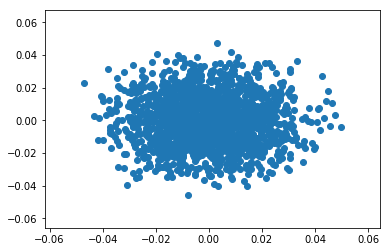

In [52]:
import matplotlib.pyplot as pyplot
%matplotlib inline 

pyplot.scatter(result[:, 0], result[:, 1])

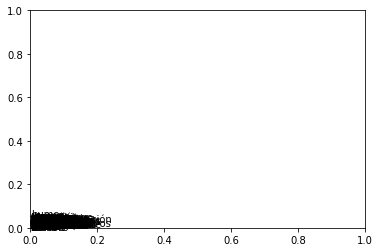

In [53]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [54]:
tweet_doc = nlp('Aqui son los hombres muy fuerte and guapo')
print(tweet_doc.vector)

[ 1.23499918e+00  1.28977969e-02  1.92433977e+00 -1.73723960e+00
  2.08076382e+00  4.94986624e-01  2.32711291e+00  7.86435604e-01
 -5.28977573e-01  1.72465229e+00 -1.95188046e+00  2.75788337e-01
 -3.00354218e+00 -3.66924381e+00  7.71069765e-01  5.11602402e-01
 -3.44344705e-01  3.77566904e-01 -1.28533983e+00  3.15844953e-01
  8.60305905e-01  9.60476995e-02  7.42251217e-01  1.13527608e+00
  1.92557490e+00 -2.18756294e+00 -3.06069827e+00  1.50500560e+00
  1.01271212e-01 -3.34268808e-01 -9.39176738e-01 -1.48506212e+00
  2.02799916e+00  2.38325620e+00 -9.28774476e-02 -2.62090206e+00
 -1.50293037e-01 -3.22847068e-01  2.38829756e+00 -1.36833930e+00
 -2.99069977e+00 -1.66103339e+00  3.59520197e+00 -1.05452919e+00
 -1.19668436e+00 -1.86461759e+00  2.01367712e+00 -1.67045426e+00
 -2.42408180e+00  7.17659295e-01 -6.59267545e-01  1.33636487e+00
 -4.01470333e-01  2.29383564e+00 -1.99000180e+00 -1.00545442e+00
  9.49966788e-01 -1.88207006e+00  3.44965816e-01 -2.70798659e+00
 -1.20150614e+00 -3.00642

## FastText examples

<b>Desired Output File Format</b>
<pre>
__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?
__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments
__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?
</pre>

In [58]:
file_aphor_labels = '/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms-label.txt'

file_aphor_nolabels = '/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms-nolabel.txt'

fh = open(file_aphor_labels, encoding='utf-8')
aphor_label_raw = fh.read()
fh.close
type(aphor_label_raw)
len(aphor_label_raw)
print(aphor_label_raw[1:500])


El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello. [[personalidades, molestia, corpóreo, cabeza, humano, cine]]





El hipopótamo parece un buzón de alcance en espera de cartas. ¿Cartas para el África? ¿Carta


In [59]:
import pandas as pd
import re
import string

# Integer weights given to tags words (0 = remove)
TAG_WT = 0
# If missing tags completely, this hold the sequential number of aphorism as linearly processed (neg = no missing tags)
tag_miss = -1

exclude_punct = set(string.punctuation)

In [60]:
aphor_wtags = [] # List of all tags associated with current aphorism
aphor_no = 0 # Current number of aphorism being processed

# FUTURE: to store in pandas df for greater functionality (e.g. graphing/EDA)
data = pd.DataFrame(columns = ['aphor', 'tags'])

def remove_dup_spaces(l):
  words = [w for w in l.split('\n') if w != '']
  return ' '.join(words)

def striplist(l):
    return([x.strip() for x in l])

# aphor_nolable_raw

# Process labelled aphorisms

aphor_tags_str = aphor_label_raw.split("]]") # Split each line into 'aphorism' and 'tags'

aphor_both = []
line_no = 0

for line in aphor_tags_str:
    line_no += 1
    line_both = line.split("[[")
    aphor = line_both[0].strip()
    try:
        line_both[1]
        tags = line_both[1].strip()
    except IndexError:
        tags = ''
        
    aphor = remove_dup_spaces(aphor)
    
    # Process Aphorism string
    line_sp = "".join([re.sub(" +"," ",x) for x in line]) # Collapse spaces
    line_nl = "".join([re.sub("\n+","\n",x) for x in line_sp]) # Collapse new lines
    # print("LINE {}: ---{}---".format(line_no, aphor))
    # print("LINE {}: ---{}---".format(line_no, tags))
    
    # Old
    # aphor0 = remove_dup_spaces(new[0])
    # aphor1 = [''.join(ch for ch in w if ch not in exclude_punct) for w in aphor0.split(' ') if len(w) > 0]
  
    # Process tag string
    if len(tags) < 2:
        print("ERROR: no tags for aphorism #{}: text: {}".format(line_no, tags))
        tags = []
        aphor_both = aphor
    else:
        tags_ws = tags.split(",")
        # print(type(tags))
        tags = [tag_word.strip() for tag_word in tags_ws]
        for tag in tags:
            aphor = "__label__{} ".format(tag) + aphor
        # striplist(tags)
        
    # aphor_both = aphor + (str(tags))
    
    # Add each processed line to the cumulative list of aphorisms with tags
    if (len(aphor) > 1):
        aphor_wtags.append(aphor)

print(len(aphor_wtags))

ERROR: no tags for aphorism #1720: text: 
1720


In [61]:
aphor_wtags[0]

'__label__cine __label__humano __label__cabeza __label__corpóreo __label__molestia __label__personalidades El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.'

In [62]:
aphor_wtags[1718]

'__label__estereotipos __label__gerundios __label__anglicismo __label__casas-de-té __label__negocios La casa de té está llena de los yes que estornudan los ingleses.'

In [64]:
file_aphor_train = "/Users/jonchun/code_lessons/nlp_workshop_201904/data/prof_gondar_delrioarrillaga/aphorisms-train.txt"

with open(file_aphor_train, 'w') as f:
    for line in aphor_wtags:
        f.write("%s\n" % line)



In [66]:
!head -n 5 aphorisms-train.txt

__label__cine __label__humano __label__cabeza __label__corpóreo __label__molestia __label__personalidades El que asiste al cinematógrafo quisiera que todo el público que llena la sala, desde su fila a la pantalla, careciese de cabeza. Necesita el calor humano de los demás para completar el espectáculo, porque no le resultaría una sala vacía, pero no le desagradaría el panorama desolador de la sala poblada de gentes sólo vivas hasta el cuello.
__label__geografía __label__epístola __label__buzón __label__objetos __label__comparaciones __label__animales __label__naturaleza El hipopótamo parece un buzón de alcance en espera de cartas. ¿Cartas para el África? ¿Cartas para la región de los Lagos Centrales? Arca postal para en medio de los desiertos caliginosos hubiéramos arrojado en su boquete una misiva cualquiera si tuviésemos amigos en aquéllas regiones inhóspitas. ¡Con qué hambre de cartas nos abre su boca en los parques zoológicos!
__label__extranjerismos __label__cocina __label__desafi